---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

**Задача** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Установка параметров позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

---

In [1]:
#загружаем нужные библиоткеи

# загружаем Pandas
import pandas as pd

# загружаем seaborn
import seaborn as sns

# отключим вывод предупреждения
pd.options.mode.chained_assignment = None

---
---

## 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
# в нашем случае текущий разделитель '\' отличается от статнартного ',' укажем это при открытии файла

try:
    df = pd.read_csv('/.../real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv("D:/DA/Yandex_Praktikum/Projects/2_reality_analisys/real_estate_data.csv", sep = '\t')

In [3]:
#снова выведем на экран первых 5 строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


# Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_image`s — число фотографий квартиры в объявлении

In [4]:
#выведем на экран общую информацию анализируемого датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы имеем дело с dataframe содержащем 22 столца, и 23 699 строк. Данные преимущественно числовые (`float64`). Встречаются также `bool` и `object`. По предварительной оценке есть проблемы с типами данных: столбец `is_apartment` имеет тип `object` хотя по смыслу это `bool`, `floors_tatal` является `float64` хотя он должен быть `int8` кроме этого есть ряд других несоответствий которые мы устранил на следующем этапе.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

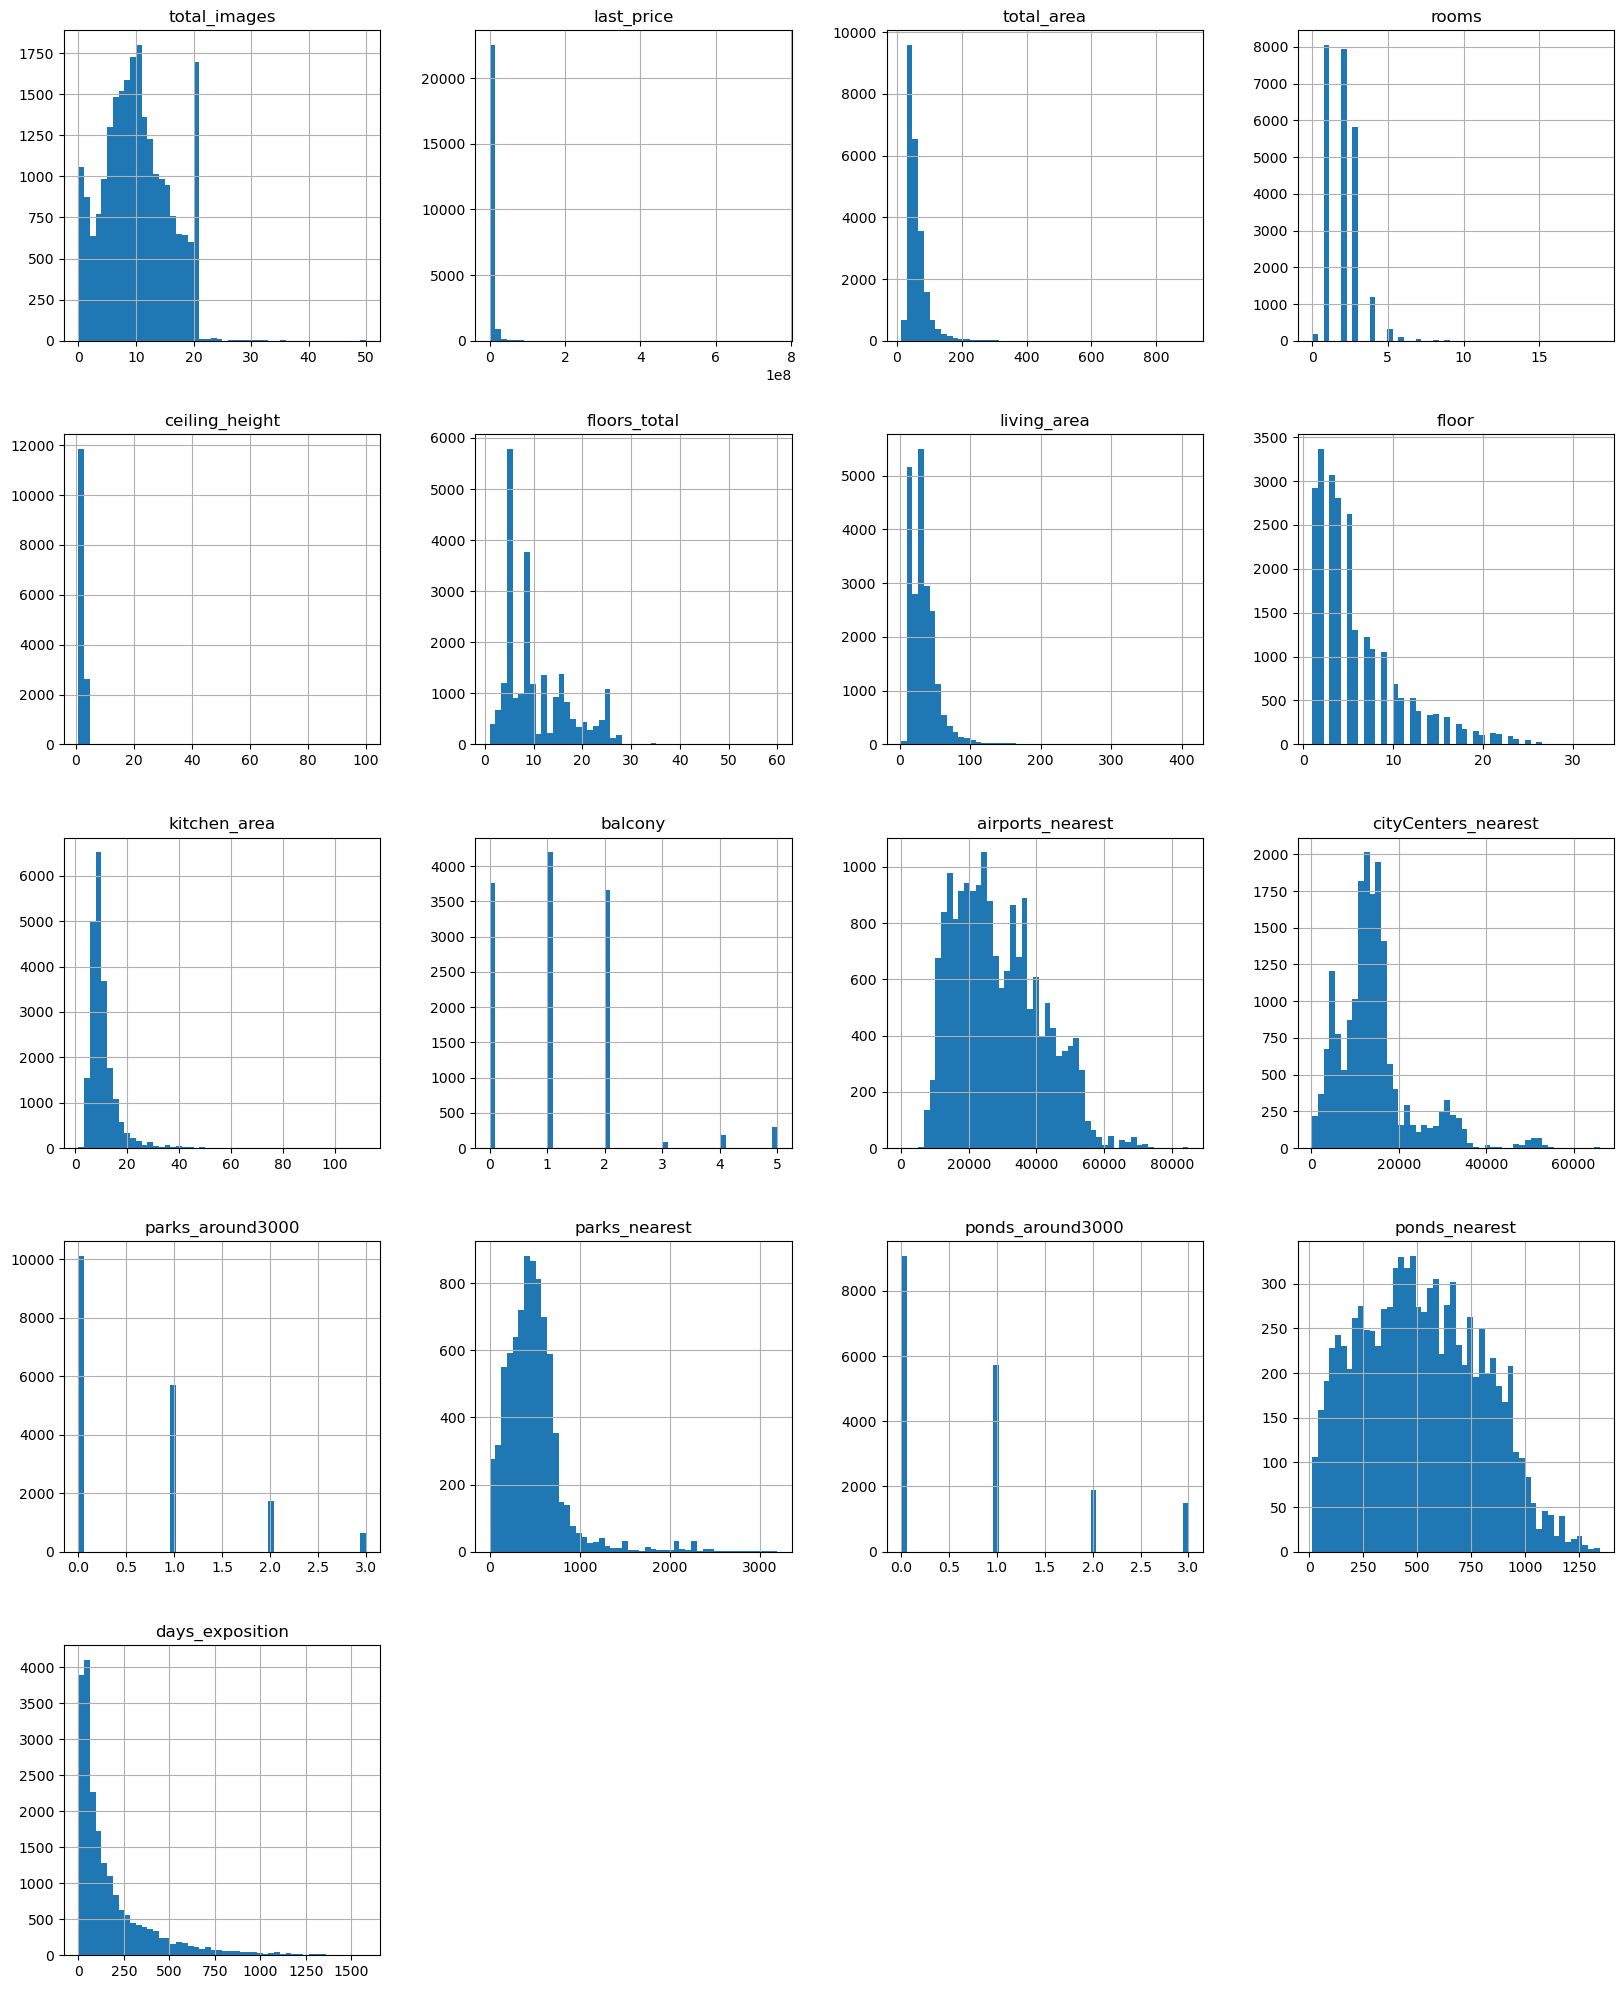

In [5]:
#оценим картину имеющихся числовых значение датасета построив гистограммы методом .hist()

df.hist(
    bins=50, # Для большей наглядности разделим дипазон на 50 столбцов 
    figsize=(20,25) # и зададим размер гистограммы 15х20
)

---
---

## 2. Предобработка данных

### 2.1 Работа с пропусками

Для начала определим в каких столбцах и сколько пропусков в нашем датасете

In [6]:
# Применим метод .isna() и посчитаем сумму получившихся значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

У нас имеются пропуски в 14 стоблцах из 22. Из них категориальных данных 2 шт. (`is_apartment`, `locality_name`) остальные количественные.

Методы работы с пропусками отличается для качественных и количественных значений. Начнем с заполненияе пропусков в полях с категориальными данным.  
  
Первый столбец это `is_apartment`.  
  
Верояно, если квартира не отностся к апартаментам, то при размещении это полу просто не заполняли, поэтому заменим пропущенные значения на False

In [7]:
# Определим какие значения есть в столбце `is_apartment`

df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [8]:
# заменим пропуски на 'False'

df['is_apartment'] = df['is_apartment'].fillna(False)

In [9]:
# Проверим результат

print('Пропущено данных:',df['is_apartment'].isna().sum())

Пропущено данных: 0


Еще один столбец с категориальным типом это указание населенного пункта `locality_name` в нем имеются 49 пропущенных значений. Способа достоверно их заполнить нет, поэтому мы их просто удалим, тем более что в статистическом плане это очень малая величина.

In [10]:
df=df.dropna(subset=['locality_name'])

In [11]:
# Проверим результат

print('Пропущено данных:',df['locality_name'].isna().sum())

Пропущено данных: 0


---

Поработаем с пропусками в столбце `ceiling_height`. Высота потолков величина ограниченная. Посмотрим на значения в нашем датасете.

<AxesSubplot:ylabel='Frequency'>

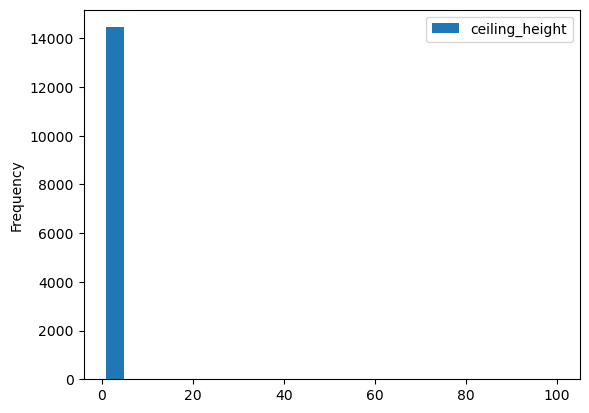

In [12]:
df.plot(
    kind='hist',
    y='ceiling_height',
    bins=25
)

Скорее всего мы имеем дело с ошибками т.к. 100 м высота потолков быть не может. Мы отработаем эту проблему позднее, сейчас же сократим диапазон до 5 м.

<AxesSubplot:ylabel='Frequency'>

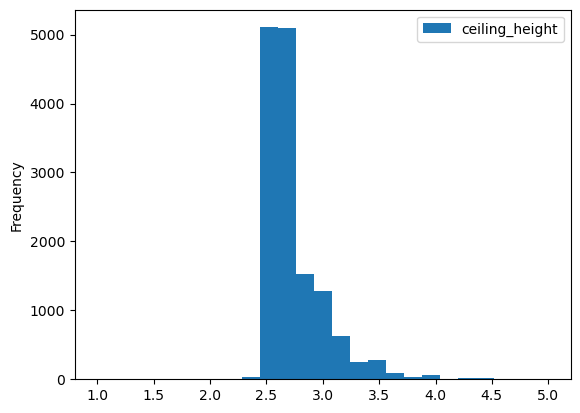

In [13]:
df.plot(
    kind='hist',
    y='ceiling_height',
    bins=25,
    range=(1,5))

Визуально, наиболее распространенным является высота потолка в районе 2,6. Определим медиану


In [14]:
df['ceiling_height'].median()

2.65

Заменим пропуски медианным значением

In [15]:
# заполним пропуски данных с столбце 'ceiling_height' методом .fillna() медианными значениями этого столбца

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [16]:
# проверим результат

df['ceiling_height'].isna().sum()

0

---

Заполним пропуски столбца `floors_total`. Для начала нарисуем гистограмму распределения данного показателя.

In [17]:
# проверим результат

df['floors_total'].isna().sum()

85

Если заполнять медианным значением то одним из вариантов при такой замене пропусков это когда этаж на котором находится квартира будет больше чем всего этажей в доме. Поэтому заменим пропуски на значение этажа на котором находися квартира.

In [18]:
df.loc[df['floors_total'].isna(),'floor']

186       4
237       1
457      12
671       8
1757      9
         ..
22542     3
22656    20
22808     6
23590    18
23658     8
Name: floor, Length: 85, dtype: int64

In [19]:
df['floors_total'] = df['floors_total'].fillna(df.loc[df['floors_total'].isna(),'floor'])

In [21]:
# проверим результат
df.loc[df['floor'] > df['floors_total']]['floor'].count()

0

---

Заполним пропуски в столбце `livint_area` Одним из параметров савязанных с жилой площадью является количесотво комнат в квартире. Заполним пропуски медианными значениями для квартир на основании количества комнат

In [22]:
for room in df['rooms'].unique():
    df.loc[(df['living_area'].isna()) & (df['rooms'] == room), 'living_area']\
    =df.loc[(df['living_area'].isna()) & (df['rooms'] == room)].fillna(df.query('rooms == @room')['living_area'].median())

In [23]:
# проверяем результа
df['living_area'].isna().sum()

0

---

При анализе информации выяснильсь, что если объект недвижимости является студией, то для части позиции в столбце 'rooms' указано 1 в остальных же 0. 

In [24]:
df.query('studio==True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Для приведения данных к общему знаменателю заменим все значения на 0.

In [25]:
df.loc[df['studio'] == True,'rooms'] = 0

In [26]:
# проверим результат

df.query('studio==True')['rooms'].value_counts()

0    149
Name: rooms, dtype: int64

---

Поработаем с пропусками в столбце `kitchen_area`. Первый вариант, если жилье является студией, то кухни нет. Проверим такие случаи

In [27]:
# посчитаем пропуски для строк в которых `studio` = True

df[df['studio'] == True]['kitchen_area'].isna().sum()

149

Результат показывает, что таких значений всего 139. Заменим их на 0.

In [28]:
# применяем для атрибута .loc условие для столбца `studio` и меняем для этих строк значение в столбце `kitchen_area`

df.loc[df['studio'] == True,'kitchen_area'] = 0

In [29]:
# проверяем результат

df[df['studio'] == True]['kitchen_area'].isna().sum()

0

Заменим остальные отсутствующие значения в столбце `kitchen_area` на медианную площадь кухни как долю от общей площади квартиры.

In [30]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*(df['kitchen_area'] / df['total_area']).median())

In [31]:
# проверим результат замены пропусков

df['kitchen_area'].isna().sum()

0

---

Вероятно, если данные о количестве балконов не указаны, то скорее всего их нет. К тому же определить достоверно эти данные не возможно поэтому заменим пропуски в столбце `balcony` на 0

In [32]:
# заменим пропуски на '0'

df['balcony'] = df['balcony'].fillna(0)

In [33]:
# Проверим результат

print('Пропущено данных:',df['balcony'].isna().sum())

Пропущено данных: 0


---

Теперь переходи к группе значений которые отражают особенности географического положения объкта, влияющие на цену, такие как удаленность от аэропорта, близость к центру города и наличие в шаговой доступности парков и водоемов. Пропуски в этих значениях будем заполнять на основе объектов имеющих такую же локацию, заполняя пропуски медианными значениями.

Начнем со столбца `airports_nearest`

In [34]:
# сгруппируем населенные пункты по названию и найдем для каждого среднее расстояние до ближайшего аэропорта
list_airports_nearest = df.groupby('locality_name')['airports_nearest'].median()

# для каждой локации заполним пропуски перебирая позиции по названию (оно у нас является индексом)
for location in list_airports_nearest.index:
    df.loc[df['locality_name'] == location ,'airports_nearest'] = \
    df.loc[df['locality_name'] == location ,'airports_nearest'].\
    fillna(list_airports_nearest[location]) # заполняем медианным значением для этой локации

In [35]:
# проверяме результат
df.loc[(df['airports_nearest'].isna())]['locality_name'].count()

5386

Остались только населенные пункты для которых вообще нет данных об удаленности от аэропорта, эти пропуски заполним заглушкой `-8888`

In [36]:
df['airports_nearest'] =df['airports_nearest'].fillna(-8888)

In [37]:
# проверяме результат
df.loc[(df['airports_nearest'].isna())]['locality_name'].count()

0

---

Заполним пропуски для столбца `cityCenters_nearest `, действуя аналогично расстоянию до аэропорта

In [38]:
# сгруппируем населенные пункты по названию и найдем для каждого среднее расстояние до центра города
list_cityCenters_nearest = df.groupby('locality_name')['cityCenters_nearest'].median()

# для каждой локации заполним пропуски перебирая позиции по названию (оно у нас является индексом)
for location in list_cityCenters_nearest.index:
    df.loc[df['locality_name'] == location ,'cityCenters_nearest'] = \
    df.loc[df['locality_name'] == location ,'cityCenters_nearest'].\
    fillna(list_cityCenters_nearest[location]) # заполняем медианным значением для этой локации

In [39]:
# проверяме результат
df.loc[(df['cityCenters_nearest'].isna())]['locality_name'].count()

5386

Остались только населенные пункты для которых вообще нет данных об удаленности от центра, эти пропуски заменим заглушкой `-7777`

In [40]:
df['cityCenters_nearest'] =df['cityCenters_nearest'].fillna(-7777)

In [41]:
# проверяме результат
df.loc[(df['cityCenters_nearest'].isna())]['locality_name'].count()

0

---

Пропуски для столбца `parks_around3000` обуслолены, вероятно тем, что в радиусе 3000 м нет парков, поэтому заменим их на 0

In [42]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [43]:
# проверяме результат
df['parks_around3000'].isna().sum()

0

---

Заполним пропуски для столбца `parks_nearest`, действуя аналогично, если пропущено, то считаем что их нет, и заменяем на 0

In [44]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)

In [45]:
# проверяме результат
df['parks_nearest'].isna().sum()

0

---

Для ближайших водоемов применяем ту же логику что и к паркам

In [46]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [47]:
# проверяме результат
df['ponds_around3000'].isna().sum()

0

---

Заполним пропуски для столбца `ponds_nearest`, действуя аналогично

In [48]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

In [49]:
# проверяме результат
df['ponds_nearest'].isna().sum()

0

---

Пропуски данных в столбце содержащем информацию о длительности размещения объявления, на мой взгляд, обусловлены тем, что на момент выгрузки информации из базы эти объявления все еще актуальны поэтому эти пропуски заполним заглушкой -1

In [50]:
df['days_exposition'] = df['days_exposition'].fillna(-1)

In [51]:
# оценим их количество

df['days_exposition'].isna().sum()

0

---

In [52]:
# Еще раз проверим какие пропуски остались в нашем дата сете
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

В нашем датасете пропуски встречались с 14 столбцах. В одном случае мы удалили строки с пропусками, т.к. эти данные (`locality_name` названия населенного пункта не возможно восстановить) возможно причиной пропуск была невнимательность лица размещавшего объявление. Для стобца `is_apartment` мы заменили все пропуски на `False`, предположив что человек продававший квартиру, а не апартаменты, даже не думал его заполнять. Такая же ситуация у нас с пропусками в столбце `balcony`, мы предположили что если балкона нет, то его даже не указвали. А также с данными о количестве и расстоянии до ближайшего парка и водоема.

Для количественных значений в большинстве случаев мы заполняли медианным значением, как наименее подверженым влиянию выбросов и уникальных значений. Такой способ на прямую мы применили к данным о высоте пололков `ceiling_height`.

Площадь кухни `kitchen_area` мы заполняли не просто медианой площадью, а медианной долей площади кухни . Пропуски о размере жилой площади `living_area` мы заполнили медианный значением в соответствии с количеством комнат в квартире.  

Еще для ряда географических данных мы применили группировку для объектов с аналогичной локацией и для этих групп произвели замену пропусков на медианные значения. Для части из них пропуски не удалось заменить, вероятно для этих локаций данный критерий не является применимым, или не считается значимым, как например удаленность от аэропорта настолько велика, что не учитывается как фактор влияющий на стоимость недвижимости.

### 2.2 Оптимизация типов данных

На данном этапе наша **задача** привести данные к типам занимающим наименьший объём памяти и соответствующих сути значений.

In [53]:
#Выведем снова информацию о типах данных в столбцах

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Данные в стоблцах `last_price`, `total_area`, `ceiling_height`, `living_area`, `kitchen_area`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` цифровые с дробной частью, поэтому для них оставим тип `float64`

---

Преобразуем дату в столбце `first_day_exposition` в более читаемый вид

In [54]:
#выведем на экран первый строки
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,27.328125,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [55]:
# переведем данные в "читаемый" формат и отбросим данные о времени (часы:минуты:секунды)

df['first_day_exposition_opt'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [56]:
# проверим результат

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19


---

Значения столбца `total_images` обозначают количество фотографий приложенных к объявлению и могут быть только целым, т.к. значение не превышает 0 можно перевести эти данные в формат `int8`. Тоже самое делаем со значениями столбца `rooms`, `floors_total`, `floor`, `balcony`, `parks_around3000`, `ponds_around3000`

In [57]:
# создадим списко с наменованиями столбцов тип данных в которых будем менять
list_of_columns = ['total_images','rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']

# зададим переменную "заглушку" со значением = 0 для замены всречающихся пропусков
empty = -1

for item in list_of_columns:
    try: # у нас для значений `parks_around3000`, `ponds_around3000` есть пропуски данных что вызовет ошибку
        df[item] = df[item].astype('int8')
    except:
        df[item] = empty #при обработке ошибок заменим пропуски на "заглушку"
        df[item] = df[item].astype('int8')

---

Значения столбца `days_exposition` содержат время экспозиции объекта, это целочисленное значение, поменяем его тип на `int`. 

In [58]:
df['days_exposition'] = df['days_exposition'].astype('int')

---

In [59]:
# проверим результат

df.dtypes

total_images                          int8
last_price                         float64
total_area                         float64
first_day_exposition                object
rooms                                 int8
ceiling_height                     float64
floors_total                          int8
living_area                        float64
floor                                 int8
is_apartment                          bool
studio                                bool
open_plan                             bool
kitchen_area                       float64
balcony                               int8
locality_name                       object
airports_nearest                   float64
cityCenters_nearest                float64
parks_around3000                      int8
parks_nearest                      float64
ponds_around3000                      int8
ponds_nearest                      float64
days_exposition                      int32
first_day_exposition_opt    datetime64[ns]
dtype: obje

**Вывод:** В исследуемом дата сете изначально было 22 столбца из которых 3 - bool, 14 - float64, 3 - ing64, 2 - object. 
Исходя из сути значений было решено преобразовать формат данных столбца о первом дне размещения в `datetime64` . Часть данных содержащих целочисленные значения были переведены в `int8` для экономии ресурсов. Остальные оставлены без изменений.


---

### 2.3 Устранение неявных дубликатов

Проверим дата сет на наличие полных дубликатов

In [60]:
df.duplicated().sum()

0

Полных дубликатов строк нет.

In [61]:
# выведем на экран список названий населенных пунктов

for item in df.sort_values(by='locality_name')['locality_name'].unique():
    print(item)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

Поработаем со столбцом `locality_name` в нем есть неявные дубликаты в названиях связанное с разными названиями типов населенных пунктов и вариациями букв "е" и "ё". Для нас тип населенного пункта не важен, поэтому мы удалим все типы.

In [62]:
# удалим все типы населенных пунктов

replace_list = ['садоводческое некоммерческое товарищество', 'при железнодорожной станции',\
                'станции', 'поселок', 'деревня', 'городской', 'коттеджный', 'посёлок', \
                'поселок городского типа', 'посёлок городского типа', 'городской посёлок', \
                'городской поселок', 'село', 'садовое товарищество', 'садовое некоммерческое товарищество', \
                'коттеджный поселок', 'коттеджный посёлок', 'городского типа']
empty_name = ''
for d in replace_list:
    df['locality_name'] = df['locality_name'].str.replace(d, empty_name, regex=True).str.strip()

In [63]:
# проверим результат и выведем на экран униккальные значения стоблца `locality_name` в алфавитном порядке по возрастанию

for city in df.sort_values(by='locality_name')['locality_name'].unique():
    print(city)

Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жил
Жилгородок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичёво
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Долина
Красное 

Остались только уникальные значения.

**Вывод:** При изучении данных о локациях в которых рамещены объекты, выявлено, что наблюдаются не явные дубликаты. Причиной являются опечатки в наименованиях типов населенных пунктов таких например как буква "Ё" вместо буквы "Ё" в слове "посЁлок", а также разные варианты названия одних и тех же населенных пунктов. Было решено исключить данные о типах совсем и использовать только уникальные названия.

---

### 2.4 Устранение редких и выбивающихся значений

#### Работаем с данными о площадях `total_area`, `living_area`, `kitchen_area`

In [64]:
#Проверим есть ли объекты в которых общая площадь квартиры `total_area` меньше жилой площади `living_area` 
#или площади кухни `kitchen_area` за вычетом 5% на нежилые помещения

df.query('total_area * 0.95 <= living_area or total_area * 0.95 <= kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt
227,13,2200000.0,47.00,2018-01-12T00:00:00,3,2.34,5,45.000,1,False,...,0,Новый Свет,-8888.0,-7777.0,0,0.0,0,0.0,45,2018-01-12
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19,30.550,2,False,...,2,Мурино,-8888.0,-7777.0,0,0.0,0,0.0,70,2018-03-08
1595,7,3200000.0,62.40,2019-04-23T00:00:00,4,2.65,5,63.800,2,False,...,1,Кингисепп,-8888.0,-7777.0,0,0.0,0,0.0,-1,2019-04-23
1992,5,4000000.0,37.40,2018-02-11T00:00:00,1,2.53,16,36.400,10,False,...,1,Санкт-Петербург,19979.0,21690.0,0,0.0,1,1052.0,74,2018-02-11
3374,18,3650000.0,41.50,2018-02-14T00:00:00,3,2.50,5,45.000,3,False,...,0,Санкт-Петербург,12842.0,11005.0,0,0.0,1,745.0,24,2018-02-14
3891,4,2600000.0,70.40,2017-07-29T00:00:00,3,2.50,5,68.100,5,False,...,3,Любань,-8888.0,-7777.0,0,0.0,0,0.0,45,2017-07-29
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4,70.000,1,True,...,0,Санкт-Петербург,31487.0,4466.0,2,353.0,1,439.0,22,2019-03-25
7857,11,150000000.0,230.00,2017-10-25T00:00:00,8,2.65,8,220.000,8,False,...,0,Санкт-Петербург,25525.0,5845.0,2,116.0,0,0.0,135,2017-10-25
7962,4,550000.0,46.20,2018-04-20T00:00:00,3,2.65,1,45.000,1,False,...,0,Луга,-8888.0,-7777.0,0,0.0,0,0.0,45,2018-04-20
8976,5,4350000.0,41.20,2017-03-17T00:00:00,3,2.50,5,45.000,3,False,...,0,Санкт-Петербург,14918.0,9601.0,0,0.0,1,694.0,560,2017-03-17


Таких объектов нашлось 50. Данные о площади в них критически нарушены и достоверно восстановить эти ошибки нет возможности. Например первая строка: общая площадь 47 м2 при этом и жилая площадь и кухня составляют 45 м2, при этом в ней 3 комнаты. Возможно в ней сделали критическую перепланировку (надеюсь без вмешательства в несущие конструкции :)) и определить тепероь функциональное назначение получившейся площади достоверно не представляется возможным, поэтому удалим эти строки

In [65]:
df = df.query('total_area * 0.95 > living_area and total_area * 0.95 > kitchen_area')

In [66]:
# Проверим результат удаления

df.query('total_area * 0.95 <= living_area or total_area * 0.95 <= kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt


Продолжим. Для остальных объектов проверим отсутствие отрицательных значений площади

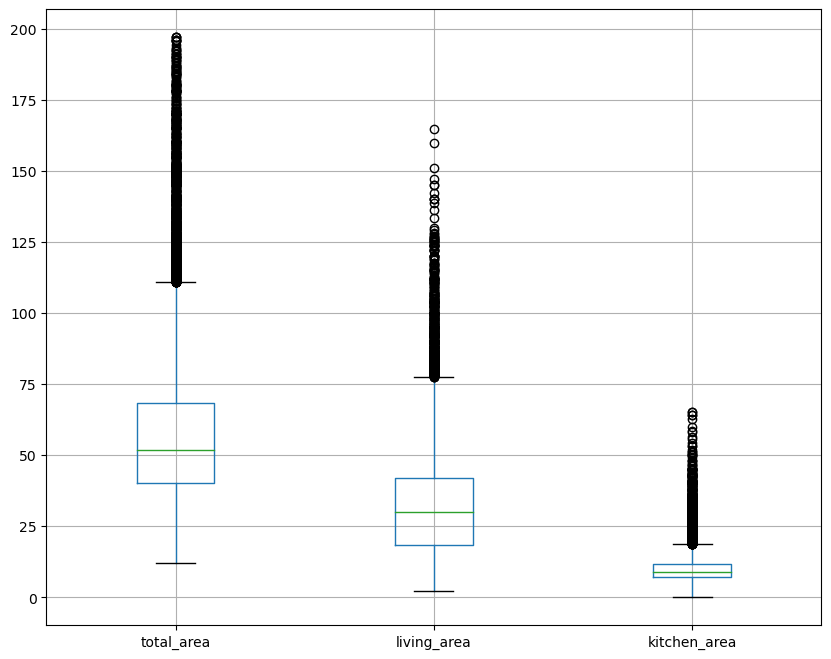

In [180]:
# проверим размах значений в столбцах 'total_area', 'living_area', 'kitchen_area'

boxplot = df.boxplot(column=['total_area', 'living_area', 'kitchen_area'], figsize=(10,8))

Отрицательных значений нет. Есть нолевые в площади кухонь, это данные для квартир-студий, для которых есть только зона кухни в жилой площади.

Теперь проверим соответствие общей площади квартиры и суммы площадей жилой зоны и кухни. Она должна составлять не более 95% от общей площади. 5% закладываем на нежилые помещения.

In [68]:
# Проверим есть ли в исследуемых данных объекты у которых 

df.query('total_area * 0.95 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,2.65,14,59.0,8,False,...,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179,2016-05-04
171,6,3800000.0,49.00,2019-02-22T00:00:00,2,2.50,9,38.0,8,False,...,1,Шушары,18471.0,24272.0,0,0.0,0,0.0,11,2019-02-22
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9,26.1,5,False,...,0,Санкт-Петербург,13952.0,15031.0,0,0.0,1,824.0,12,2018-02-14
220,8,3890000.0,37.00,2018-07-09T00:00:00,1,2.50,25,28.0,6,False,...,0,Санкт-Петербург,25408.0,16166.0,0,0.0,0,0.0,28,2018-07-09
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3,88.0,3,False,...,1,Санкт-Петербург,39363.0,13270.0,0,0.0,0,0.0,90,2016-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16,16.0,12,False,...,0,Тосно,-8888.0,-7777.0,0,0.0,0,0.0,115,2016-04-04
23202,13,4919880.0,67.92,2018-10-23T00:00:00,2,2.65,3,63.0,3,False,...,0,Всеволожск,-8888.0,-7777.0,0,0.0,0,0.0,60,2018-10-23
23297,10,1850000.0,48.20,2019-03-13T00:00:00,2,2.65,5,42.2,2,False,...,1,Высоцк,-8888.0,-7777.0,0,0.0,0,0.0,45,2019-03-13
23613,4,3950000.0,52.00,2018-03-04T00:00:00,3,2.65,5,45.0,2,False,...,0,Парголово,55549.0,21223.0,0,0.0,0,0.0,45,2018-03-04


Нашлось 1280 объектов с подобным дисбалансом. Напишем функцию `living_area_recount()` которая будет пересчитывать данные о площади

In [69]:
# объявляем функцию
def living_area_recount(row):
    
    # вычисляем основную площадь без нежилой берем долю с запасом в 1% от принятой нормы
    total_area = row['total_area'] * 0.94
    
    # вычисляем основную площадь квартиры как сумму жилой и кухни
    main_area = row['living_area'] + row['kitchen_area']
    
    # задаем площадь кухни
    kitchen_area = row['kitchen_area']
    
    # задаем жилую площадь
    living_area = row['living_area']
    
    # проверяме соотношение общей площади и основной, если общая площадь меньше то пересчитчваем жилую
    if total_area <= main_area:
        living_area_cor = total_area - kitchen_area
        return living_area_cor
    
    # если общяя больше то возвращаем текущий размер жилой
    if total_area > main_area:
        living_area_cor = living_area
        return living_area_cor

In [70]:
# применяем функцию к нашим данным, результат заносим в новый столбец `living_area_cor`
df['living_area_cor'] = df.apply(living_area_recount, axis=1)

In [71]:
# проверяем результат работы функции
df.query('total_area * 0.95 < (living_area_cor + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor


После исравления ошибок, вернемся к изучению аномалий в площадях. Сделаем это для общей площади, как наиболее значимой для результатов

<AxesSubplot:>

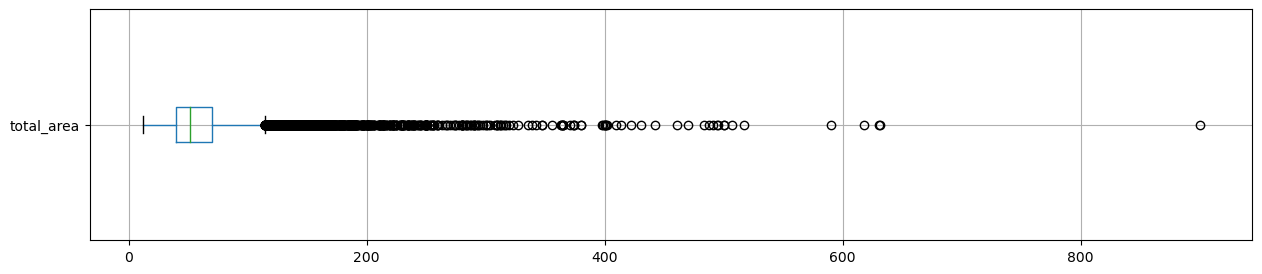

In [72]:
# ввернемся к диаграмме размаха и изучим ее еще раз

df.boxplot(column=['total_area'], figsize=(15,3), vert=False)

In [73]:
df['total_area'].describe()

count    23600.000000
mean        60.347979
std         35.660934
min         12.000000
25%         40.000000
50%         52.000000
75%         69.742500
max        900.000000
Name: total_area, dtype: float64

У нас наблюдается длинный "хвост" в сторону максимальных значений. Т.е. есть ряд выбросов которые могут повлиять на наш результат. Для нормализации выборки мы будем в дальнейшем использовать **Референтный размах** - который исключает влияние последниего 1% выборки.  

К вопросу удаления вернемся в конце этапа, после оценки всех исследуемых величин.

In [74]:
# рассчитаем последний персентиль

df['total_area'].quantile(.99)

197.20699999999886

---

#### Работаем с данными столбца `ceiling_height`

<AxesSubplot:>

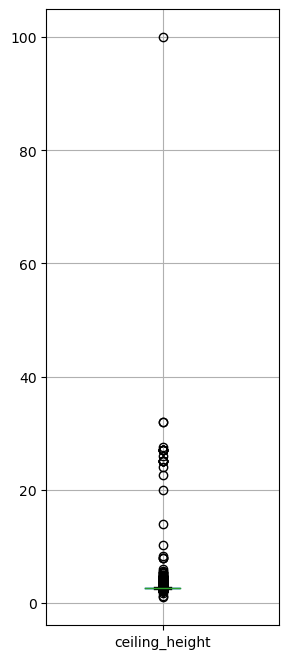

In [75]:
# построим диаграмму размаха для оценки разброса значений

df.boxplot('ceiling_height',figsize=(3,8))

Наблюдается ряд аномальных значений в нижнем и верхнем диапазоне. Для начала приведем точность к 1 знаку после запятой и выведем значения по возрастанию

In [76]:
df['ceiling_height'].round(1).sort_values(ascending=True).unique()

array([  1. ,   1.2,   1.8,   2. ,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.2,   5.3,   5.5,
         5.6,   6. ,   8. ,   8.3,  10.3,  14. ,  20. ,  22.6,  24. ,
        25. ,  26. ,  27. ,  27.5,  32. , 100. ])

Будем считать нормальной высоту потолков не ниже 2,4 м и не выше 6 м. Создадим функцию для приведения значений в обозначенный диапазон. В случае выхода за рамки считаме "типовым" значением 2,4 м

In [77]:
# создадим функцию которая будет менять значение высоты потолка по условиям
def cor_ceiling_height(height):
    if 2.4 <= height <= 6: # значение в нормальном диапазоне, возвращаем текущее значение
        return height
    elif 24 <= height <= 60: # если значение в этом диапазоне, возможно это опечатка в расположении запятой
        return height / 10
    else: # во всех других случаях возвращаем "типовую высоту"
        return 2.4
    
# применим функцию к столбцу 'ceiling_height'
df['ceiling_height'] = df['ceiling_height'].apply(cor_ceiling_height)

In [78]:
# проверяем результат
df['ceiling_height'].round(1).sort_values(ascending=True).unique()

array([2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.2, 5.3, 5.5, 5.6, 6. ])

<AxesSubplot:>

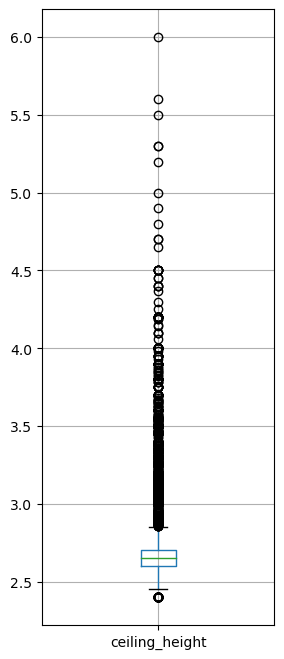

In [79]:
# построим диаграмму размаха для оценки результата

df.boxplot('ceiling_height',figsize=(3,8))

---

#### Работаем с данными столбца `floor`

<AxesSubplot:>

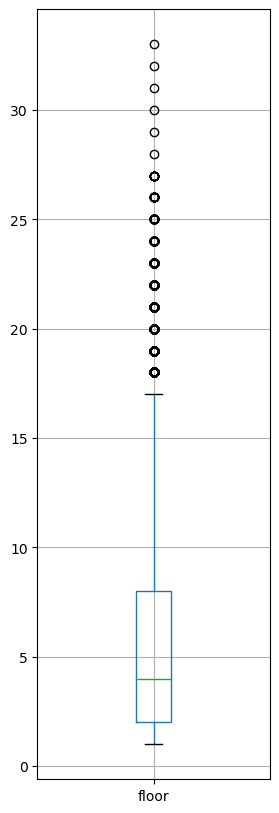

In [80]:
# построим диаграмму размаха для оценки разброса значений

df.boxplot('floor',figsize=(3,10))

In [81]:
df['floor'].describe()

count    23600.000000
mean         5.897542
std          4.884636
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Основное количество зданий этажностью до 17, при этом имеется ряд значений до 33 этажа. На первый взгляд никаких корректировок делать не нужно.

---

#### Работаем с данными столбца `floors_total`

<AxesSubplot:>

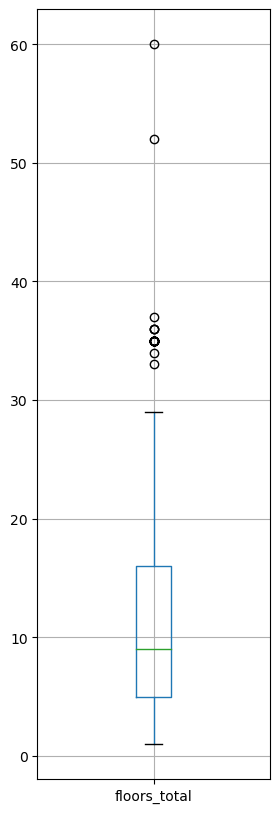

In [82]:
# построим диаграмму размаха для оценки разброса значений

df.boxplot('floors_total',figsize=(3,10))

In [83]:
# посмотрим отдельно значения для которых 'floors_total' больше 35
df.query('floors_total > 35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,2.65,36,21.4,28,False,...,Санкт-Петербург,18732.0,20444.0,0,0.0,3,80.0,11,2018-03-22,21.4
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,False,...,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166,2018-06-28,27.4
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,2.70,36,41.0,13,False,...,Санкт-Петербург,18732.0,20444.0,0,0.0,3,80.0,38,2019-01-09,41.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.70,36,40.0,29,False,...,Санкт-Петербург,18732.0,20444.0,0,0.0,3,80.0,-1,2019-02-22,40.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,False,...,Санкт-Петербург,20728.0,12978.0,1,793.0,0,0.0,45,2018-09-24,10.5
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,2.40,37,17.4,5,False,...,Санкт-Петербург,18732.0,20444.0,0,0.0,3,80.0,71,2017-10-17,17.4


Значение 52 и 60 (в Кронштате) выглядит как опечатка, скорее всего это 22 и 6 этажей сответственно. Соласно данным https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0 в Питере нет зданий 36 этажей, это может быть только 1 ЖК «Князь Александр Невский» высотой 37 этажей. Судя по расстоянию от центра это одна локация. 

In [84]:
df.loc[df['floors_total'] == 60, 'floors_total'] = 6

In [85]:
df.loc[df['floors_total'] == 52, 'floors_total'] = 22

In [86]:
df.loc[df['floors_total'] == 36, 'floors_total'] = 37

In [87]:
# проверим
df.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor


<AxesSubplot:>

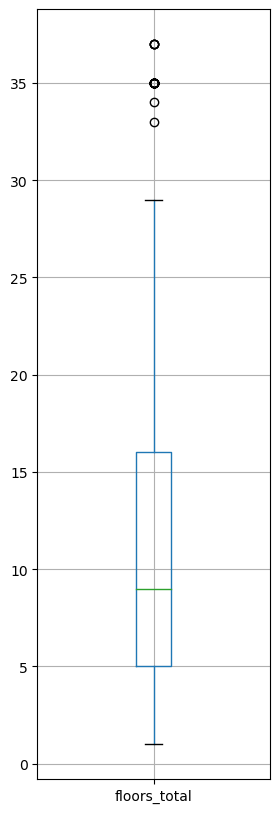

In [88]:
# построим еще раз диагрмму размаха

df.boxplot('floors_total',figsize=(3,10))

Ошибки убраны

---

#### Работаем с данными столбца `cityCenters_nearest`

<AxesSubplot:>

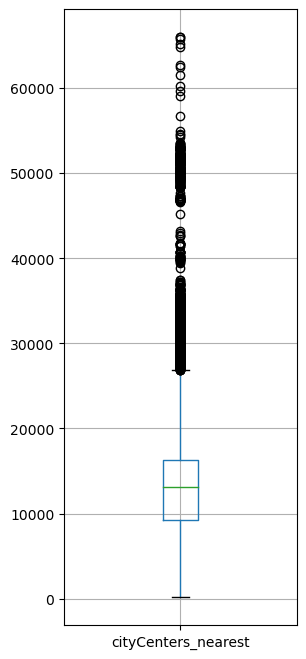

In [89]:
# построим диаграмму размаха для оценки разброса значений (исключив при этом "заглушку" = -7777)
df.query('cityCenters_nearest != -7777').boxplot('cityCenters_nearest', figsize=(3,8))

У нас наблюдаются значения более 30 000. Вероятно это расстояние от загородной недвижимости до центра Санкт-Петербурга. 

---

#### Работаем с данными столбца `airports_nearest`

<AxesSubplot:>

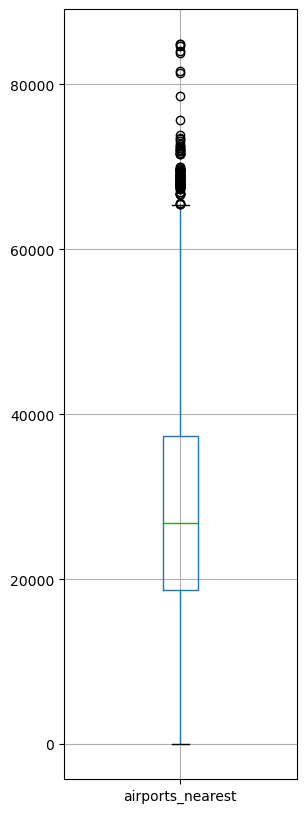

In [90]:
# построим диаграмму размаха для оценки разброса значений без учета "заглушки" = -8888

df.query('airports_nearest != -8888').boxplot('airports_nearest',figsize=(3,10))

Есть значения с расстоянием 0. Посмотрим их по ближе

In [91]:
df.query('airports_nearest==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,False,...,Санкт-Петербург,0.0,22801.0,0,0.0,0,0.0,60,2018-09-23,19.8


Это явная ошибка, удалим эту строку

In [92]:
df = df.loc[df['airports_nearest'] != 0 ]

In [93]:
# Проверим результат

df.query('airports_nearest==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor


---

#### Работаем с данными столбца `parks_nearest`

<AxesSubplot:>

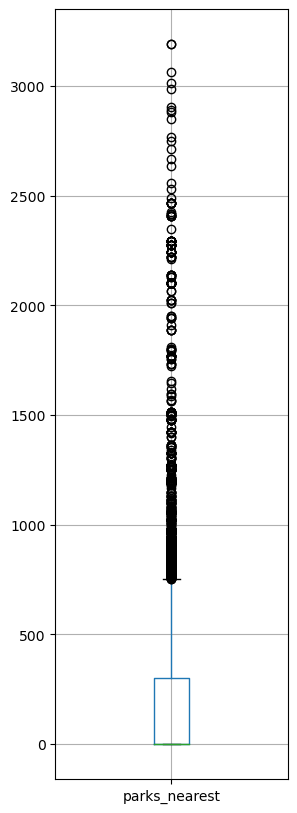

In [94]:
# построим диаграмму размаха для оценки разброса значений

df.boxplot('parks_nearest',figsize=(3,10))

На диаграмме видно что есть значения больше чем 3000, по смыслу значений эти данные нужно отбросить, т.к. мы учитываем только парки находящиеся в радиусве 3000

In [95]:
df.query('parks_nearest > 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.65,18,37.0,13,False,...,Санкт-Петербург,14878.0,9791.0,0,3064.0,1,264.0,4,2017-07-11,37.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.65,5,17.7,2,False,...,Санкт-Петербург,14821.0,9734.0,0,3190.0,1,431.0,234,2017-03-21,17.7
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.00,2,80.0,2,False,...,Санкт-Петербург,36805.0,8656.0,0,3013.0,3,537.0,49,2017-10-12,80.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.60,5,16.5,1,False,...,Санкт-Петербург,14821.0,9734.0,0,3190.0,1,431.0,176,2018-02-22,16.5


---

#### Работаем с данными столбца `parks_around3000`

In [96]:
df['parks_around3000'].unique()

array([1, 0, 2, 3], dtype=int8)

Значения в норме

---

#### Работаем с данными столбца `days_exposition`

<AxesSubplot:>

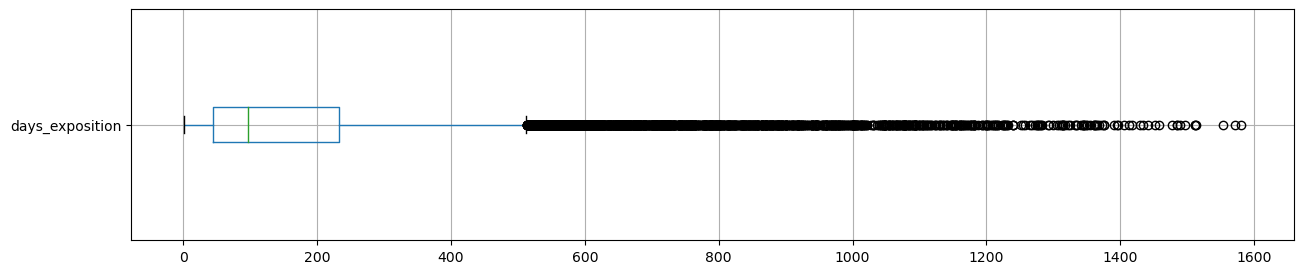

In [97]:
# построим диаграмму размаха для оценки разброса значений, исключив "заглушку"

df.query('days_exposition>0').boxplot('days_exposition',figsize=(15,3), vert=False)

В данных наблюдается значимое количество наблюдений выше границы правого "уса" Оценим их количество

In [98]:
high_border = df['days_exposition'].quantile(.75)+1.5*(df['days_exposition'].quantile(.75)-df['days_exposition'].quantile(.25))
df.query('days_exposition>@high_border')['days_exposition'].count()

2024

Исключение такого количества данных может сказаться на достоверности результатов, поэтому уберем только нижний и верхний персентиль

In [99]:
df.query('days_exposition>0')['days_exposition'].quantile(.01)

4.0

In [100]:
df.query('days_exposition>0')['days_exposition'].quantile(.99)

1069.0

#### Работаем с данными столбца `last_price`

<AxesSubplot:>

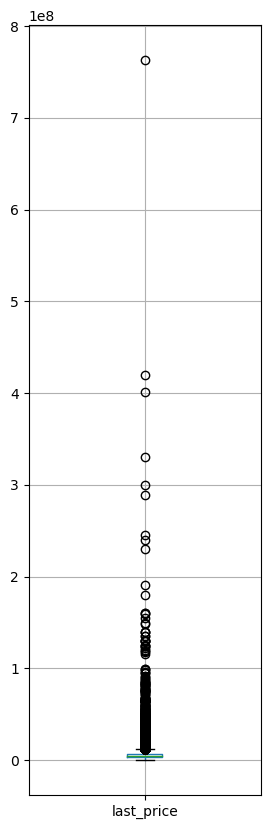

In [101]:
df.boxplot('last_price',figsize=(3,10))

In [102]:
df['last_price'].describe()

count    2.359900e+04
mean     6.540389e+06
std      1.086658e+07
min      1.219000e+04
25%      3.414000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Цена квартиры в 120 000 руб кажется неправдоподобной, посмотрим значения которые ниже 1 млн.

In [103]:
df.query('last_price<500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.65,1,23.0,1,False,...,Будогощь,-8888.0,-7777.0,0,0.0,0,0.0,233,2017-07-31,23.000000
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,2.65,5,17.6,3,False,...,Старополье,-8888.0,-7777.0,0,0.0,0,0.0,43,2017-12-11,17.600000
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,Санкт-Петербург,36421.0,9176.0,1,805.0,0,0.0,8,2019-03-20,32.000000
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.65,5,30.3,3,False,...,Старополье,-8888.0,-7777.0,0,0.0,0,0.0,96,2018-08-31,30.300000
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.50,5,17.0,5,False,...,Сланцы,-8888.0,-7777.0,0,0.0,0,0.0,719,2016-05-05,17.000000
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.65,3,30.5,3,False,...,Свирь,-8888.0,-7777.0,0,0.0,0,0.0,44,2018-06-26,30.500000
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,2.65,2,16.0,1,False,...,Сланцы,-8888.0,-7777.0,0,0.0,0,0.0,83,2019-01-06,16.000000
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2,30.5,1,False,...,Вахнова Кара,-8888.0,-7777.0,0,0.0,0,0.0,45,2018-07-11,29.572812
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.65,5,17.6,1,False,...,Старополье,-8888.0,-7777.0,0,0.0,0,0.0,45,2018-07-10,17.600000
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.65,2,16.0,1,False,...,Сланцы,-8888.0,-7777.0,0,0.0,0,0.0,-1,2019-04-22,16.000000


В данных есть явные ошибки (напримет строка 8793: квартира в Санкт-Петербурге площадью 109 метров не может стоить 12 тыс.руб. и выбросы. Для их исключения рассчитаем нижний и верхний 1% персентиль

In [104]:
# расчитаем нижний персентиль

df['last_price'].quantile(.01)

1000000.0

In [105]:
# расчитаем верхний персентиль

df['last_price'].quantile(.99)

36000000.0

К вопросу исключения вернемся после оценки всех параметров

#### Работаем с данными столбца `rooms`

<AxesSubplot:>

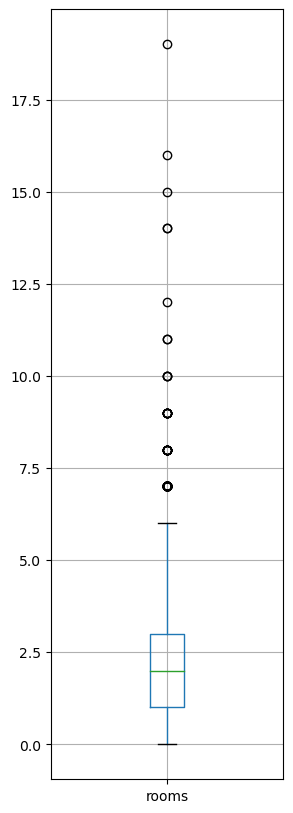

In [106]:
df.boxplot('rooms',figsize=(3,10))

В значениях имеются выбросы. Найдем вверхний персентиль.

In [107]:
df['rooms'].quantile(.99)

5.0

#### Исключение редких и выбивающихся значений

Таким образом по итогам поиска редких и выбивающихся значений мы пришли к выводу, что значения которые отразятся на итоговых выводах содержаться в столбцах `total_area`, `last_price`, `rooms` и `days_exposition`. 

Определим количество исключаемых элементов по каждому параметру

In [108]:
df.query('rooms>5')['rooms'].count()

191

In [109]:
df.query('1000000>last_price or last_price>36000000')['last_price'].count()

459

In [110]:
df.query('total_area>197')['total_area'].count()

237

In [111]:
df.query('days_exposition >0 and days_exposition<4 or days_exposition>1065')['days_exposition'].count()

371

In [112]:
df.query('rooms>5')['rooms'].count()+\
df.query('1000000>last_price or last_price>36000000')['last_price'].count()+\
df.query('total_area>197')['total_area'].count()+\
df.query('days_exposition >0 and (days_exposition<4 or days_exposition>1065)')['days_exposition'].count()

1258

Если множества не пересекаются то мы исключим 1258 строк

Теперь применим все условия сразу

In [113]:
df.query('\
    rooms>5 or\
    total_area>197 or\
    (last_price<1000000 or last_price>36000000) or\
    (days_exposition >0 and\
    (days_exposition<4 or days_exposition>1065))'
)\
['total_area'].count()

1025

Таким образом, Часть множеств обозначенная нашими условиями пересекается, при этом общее количество исключаемых данных 1 025 строки или 4,3%, не окажет значимого влияния на результаты исследования

In [114]:
df = df.loc[(df['last_price']>= 1000000) & (df['last_price']<= 36000000)]

In [115]:
df = df.loc[df['total_area']<= 197]

In [116]:
df = df.loc[(df['days_exposition']<=0) | ((df['days_exposition']>=4) & (df['days_exposition']<=1065))]

Проверим результат обработки данных

<AxesSubplot:>

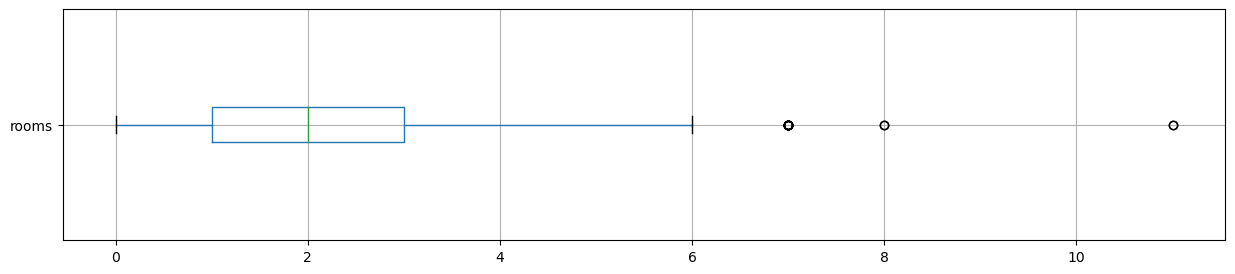

In [117]:
df.boxplot(column='rooms',figsize=(15,3), vert=False)

<AxesSubplot:>

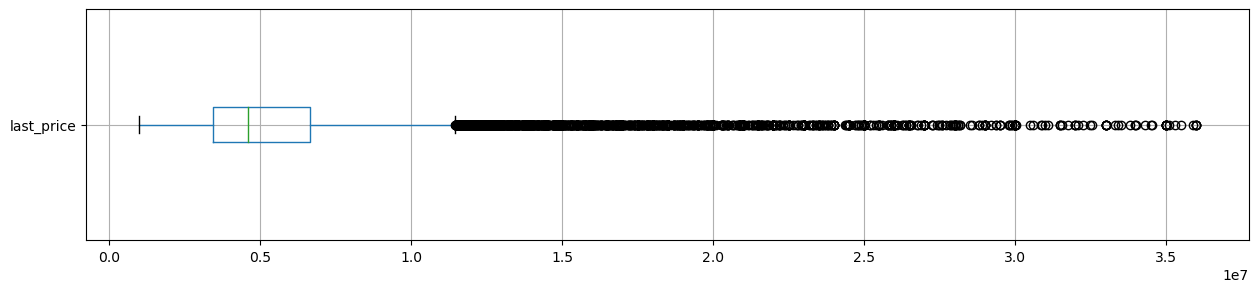

In [118]:
df.boxplot('last_price',figsize=(15,3), vert=False)

<AxesSubplot:>

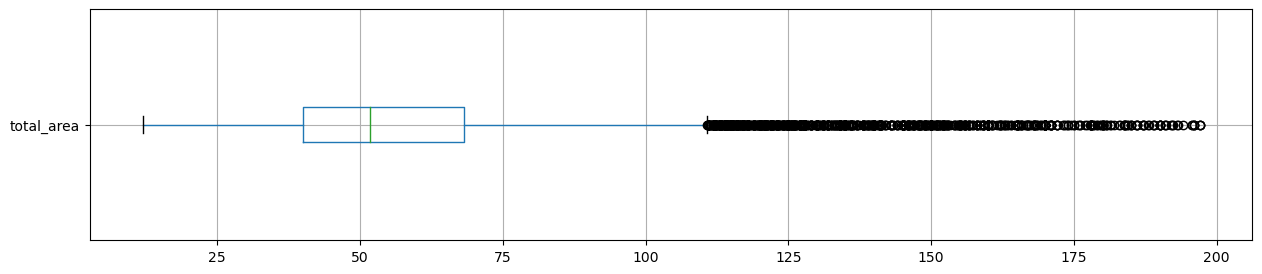

In [119]:
df.boxplot('total_area',figsize=(15,3), vert=False)

<AxesSubplot:>

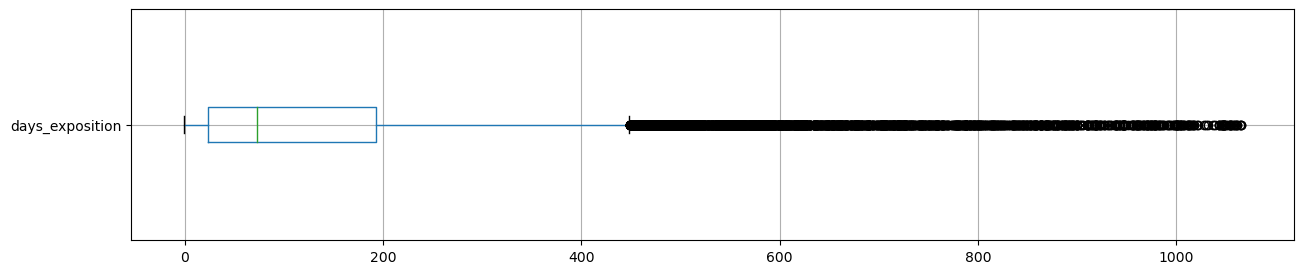

In [120]:
df.boxplot('days_exposition',figsize=(15,3), vert=False)

Данные выглядят более сбалансированными. Продолжим анализ.

**Вывод** В группе данных описывающих площадь продаваемых квартир был найден ряд ошибок в пропорциях между общей площадью, жилой площадью и площадью кухни. Которые были устранены. Также выявили часть квартир с экстремально большой площадью, и решено было убрать те которые принадлежат 99 персентилю.  
В данных о высоте потолков мы обнаружили ряд ошибочных данных в нижней и верхней части диапазона. Что-то было признано опечаткой, а часть просто заменили т.к. это параметр не являющийся ключевым в рамках данного исследования.
Выбивающихся данных в этаже квартиры не обнаружено.  
В данных о общем количестве этажей в доме были выявлены опечатки (60 этаж в Кронштате вместо 6) и неточности. Данные о высотности зданий взяты из открытых источников.  
Данные об удаленности объекта до центра города не редактировались, хотя под вопросом суть указанной информации. Имеются значения до 60 км и более, при чем размер самого Санкт-Петербурга не более 15 км до КАД.  
В данных об удаленности от аэропорта удалено значение квартиры расположенной в 0 км от аэропорта.  
В данных о ближайшем парке есть ряд значений выходящих за диапазон в 3 км., но они оставлены в силу незначительности параметра.
Информация о количестве парков в округе вопросов не вызвала.  
При изучении срока размещения объявления были выявлены экстремально длительные (более 1069 дней) сроки продажи которые было принято исключить наряду с экстремально быстрыми (менее 4 дней), которые было решено исключить для корректных результатов исследования.  
В данных о финальной стоимости также были обнаружены драматические значения. Которые в нижней части скорее всего обусловлены ошибками, а в верхней уникальностью продаваемых объектов. Под исключение попали по 1% с каждой стороны.  
В данных о количестве комнат также наблюдались аномальные значения в верхней части диапазона. Верхний персентиль составил 5 комнат, при этом максимальное значение было 18. Их решили исключить для уменьшения влияния на результат.  
Итого было принято решение исключить верхних персентиль значений о количестве комнат, общей площади, итоговой цене и днях продажи, кроме того исключили нижний персентиль для цены и срока продажи. С учетом пересечения диапазонов это составило 1025 значений или 4,5% от общей выборки.

----
---

## 3 Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу следующие столбцы

**- цена одного квадратного метра**

In [121]:
# добавим столбец с данныим стоимости квадратного метра

df['area_cost'] =  (df['last_price'] / df['total_area']).round(0)

# оптимизируем тип данных нового столбца
df['area_cost'] = df['area_cost'].astype('int')

**- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [122]:
# применим dt.weekday к столбцу с информацие о нате размещения
df['weekday_of_first_day'] = df['first_day_exposition_opt'].dt.weekday

# оптимизируем тип данных нового столбца
df['weekday_of_first_day'] = df['weekday_of_first_day'].astype('int8')

**- месяц публикации объявления**

In [123]:
df['month_of_release'] = pd.DatetimeIndex(df['first_day_exposition']).month

**- год публикации объявления**

In [124]:
df['year_of_release'] = pd.DatetimeIndex(df['first_day_exposition']).year

**- тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

In [125]:
# объявим функцию которая будет определять тип этажа
def floor_type(row):
    
    # присвоим переменной значение этажа квартиры
    floor = row['floor'] 
    
    #присвоим переменной значение количества этажей в доме
    floors_total = row['floors_total']

    if (floor == 1) and (floors_total != 0): #проверим условие "если этаж квартиры = 1 и не равен 0 то вернется "первый"
        return 'первый'
    elif floor == floors_total: #если этаж квартиры совпадает с максимальным количеством этажей в доме то будет "последний"
        return 'последний'
    else: # если ранее ничего не совпало, то вернется значение "прочий"
        return 'другой'

In [126]:
#Применим нашу функцию к данным, результат сохраним в новом столбце
df['floor_type'] = df.apply(floor_type, axis = 1)

**- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [127]:
# поделим расстояние до цента на 1000 и округлим значение
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).round()

# оптимизируем тип данных нового столбца
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')

In [128]:
# Проверим результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor,area_cost,weekday_of_first_day,month_of_release,year_of_release,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,755.0,-1,2019-03-07,51.0,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,0.0,81,2018-12-04,18.6,82921,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,574.0,558,2015-08-20,34.3,92786,3,8,2015,другой,14
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,48.0,121,2018-06-19,32.0,100000,1,6,2018,другой,8
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,False,...,0.0,55,2018-09-10,14.4,95066,0,9,2018,другой,-8


---

## 4 Проведите исследовательский анализ данных

### 4.1 Изучим подробнее параметры объектов

Начнём изучение данных со столбца `total_area`

<AxesSubplot:>

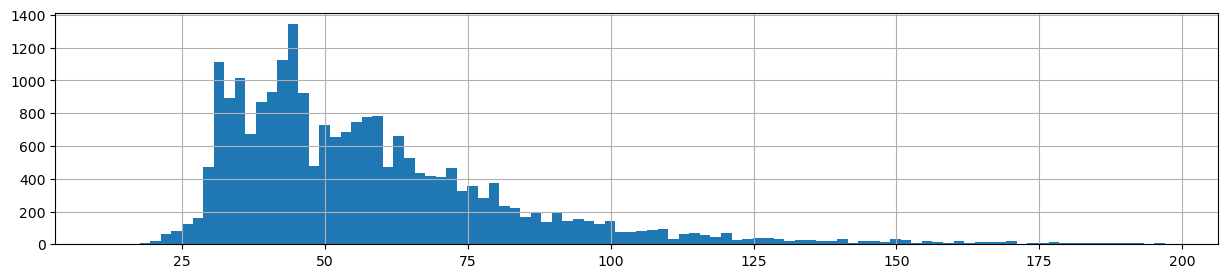

In [129]:
# построим гистограмму распределения значений

df['total_area'].hist(bins=100, figsize=(15,3))

<AxesSubplot:>

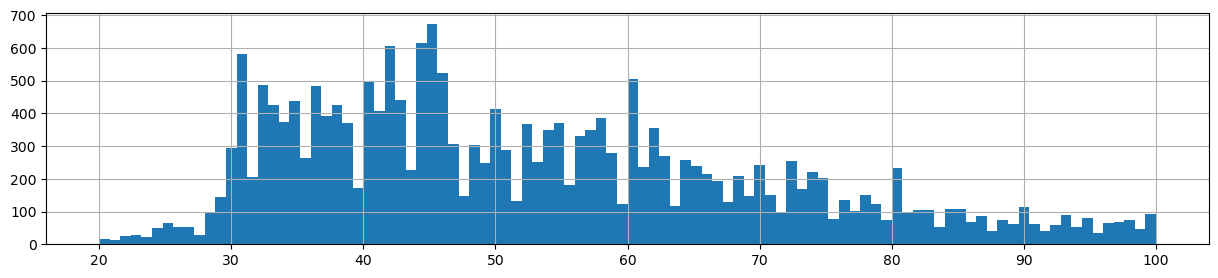

In [130]:
# посмотрим детальнее данные наиболее насыщенного диапазона

df['total_area'].hist(bins=100, figsize=(15,3), range=(20,100))

Данные по общей площади не соответствуют нормальному распределению. Наибольшее предложение квартир с площадью около 45 (скорее всего 2 комнатные) квадратных метров, пик с чуть меньшим значением для площади около 30 (вероятно 1 комнатные), также есть пиковое значение на 60 метрах вероятно 3 комнатные квартиры, далее идет снижение предложения с увеличением площади.

Рассмотрим столбец `living_area_cor`

<AxesSubplot:>

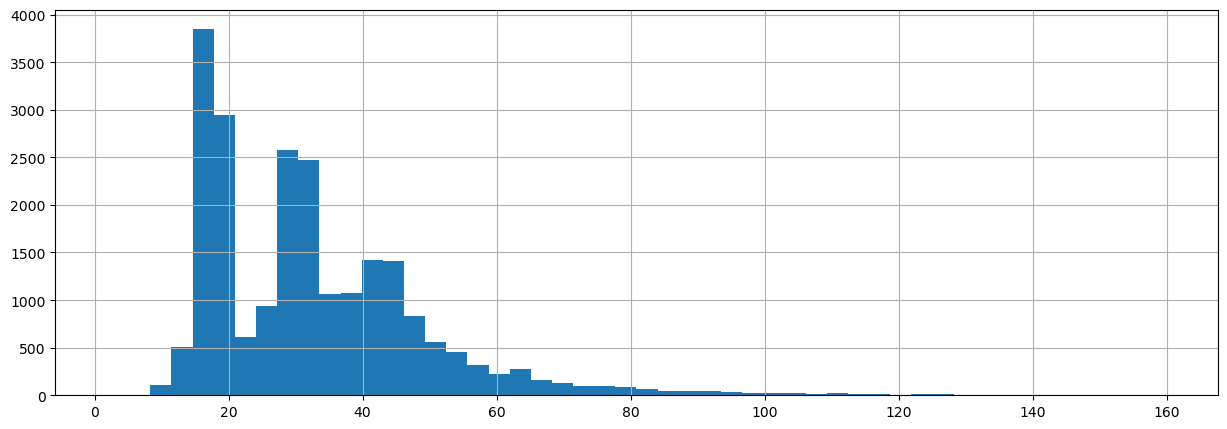

In [131]:
# построим гистограмму распределения значений

df['living_area_cor'].hist(bins=50, figsize=(15,5))

<AxesSubplot:>

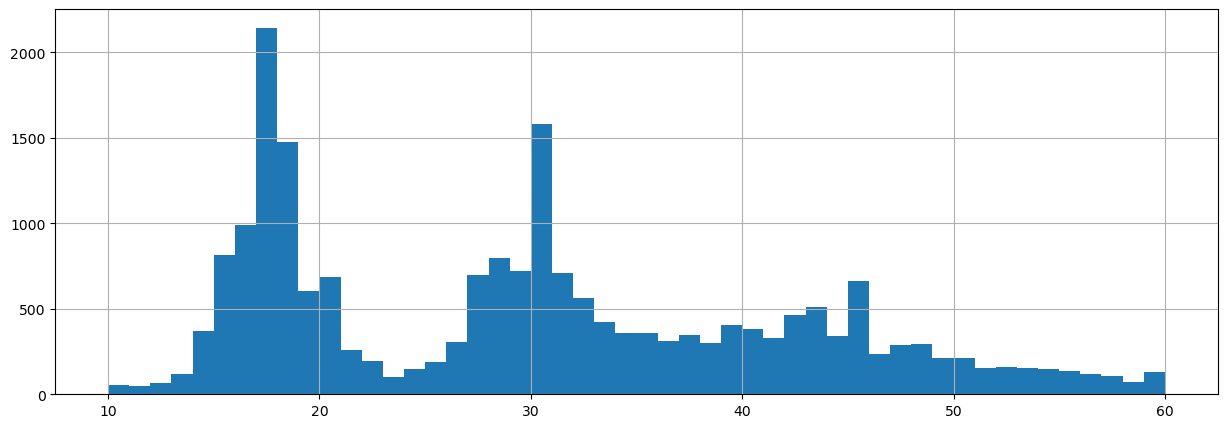

In [132]:
# посмотрим детальнее данные наиболее насыщенного диапазона

df['living_area_cor'].hist(bins=50, figsize=(15,5), range=(10,60))

Для жилой площади наблюдаются похожие закономерности. 3 пика 18 метров для однушек, 30 для двушек и 45 для трехкомнатных квартир. При этом наблюдаются какие-то наиболее растространенные значения, возможно для типовых серий домов.

Рассмотрим столбец `kitchen_area`

<AxesSubplot:>

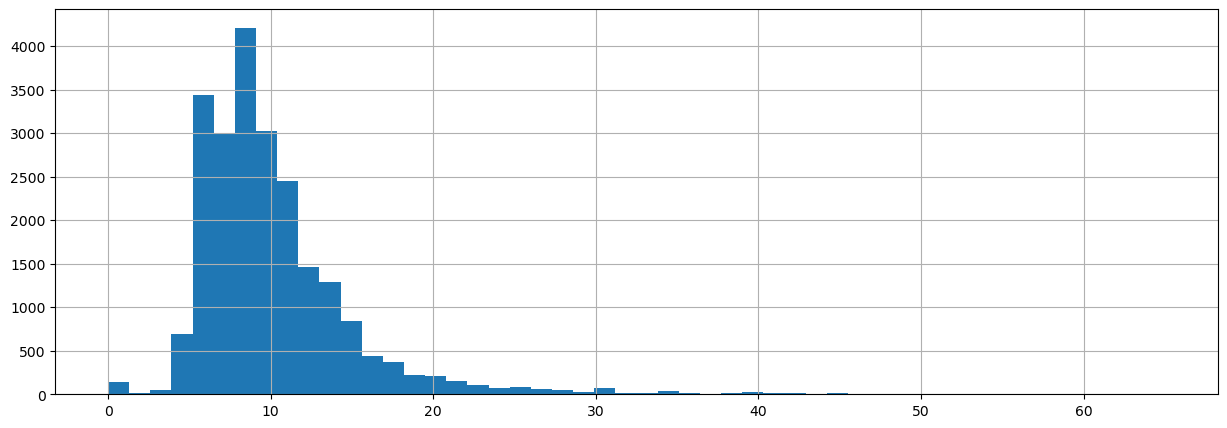

In [133]:
# построим гистограмму распределения значений

df['kitchen_area'].hist(bins=50, figsize=(15,5))

<AxesSubplot:>

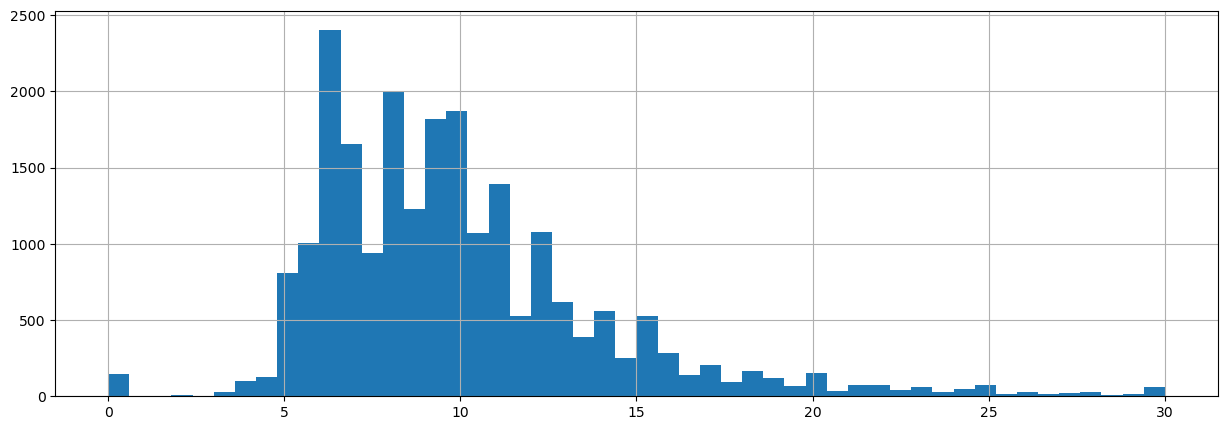

In [134]:
# посмотрим детальнее данные наиболее насыщенного диапазона

df['kitchen_area'].hist(bins=50, figsize=(15,5), range=(0,30))

Наиболее распространенная площадь около 6 и 10 метров. При этом есть какие-то наиболее распространенные значения, вероятно для каких-то типовых проектов домов.

Рассмотрим данные о количестве комнат `rooms`

<AxesSubplot:ylabel='Frequency'>

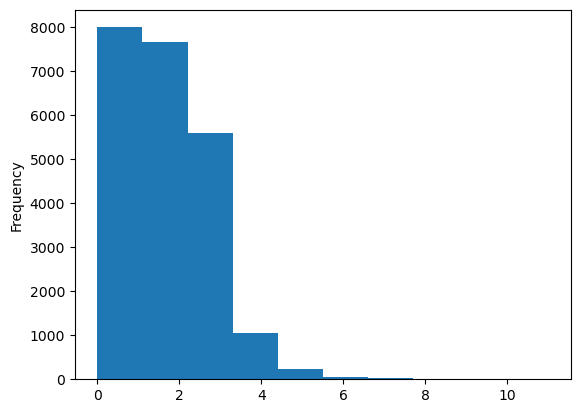

In [135]:
# построим гистограмму распределения значений

df['rooms'].plot(kind='hist')

Наибольшее количество на рынке однокомнатных квартир, затем следуют двушки с небольшим отставанием трешки. Предложение студий находится на уровне статистической погрешности. Также заметно ниже предложения квартив с 4 5 комнатами.

Рассмотрим данные о стоимости квартир `last_price`

<AxesSubplot:ylabel='Frequency'>

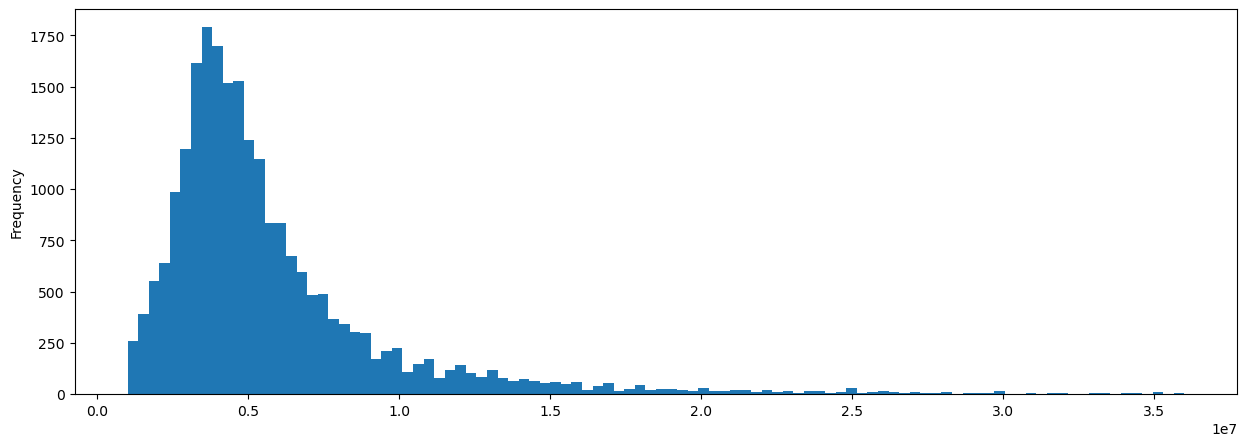

In [136]:
# построим гистограмму распределения значений

df['last_price'].plot(kind='hist', bins=100, figsize=(15,5))#, range=(0,30))

<AxesSubplot:>

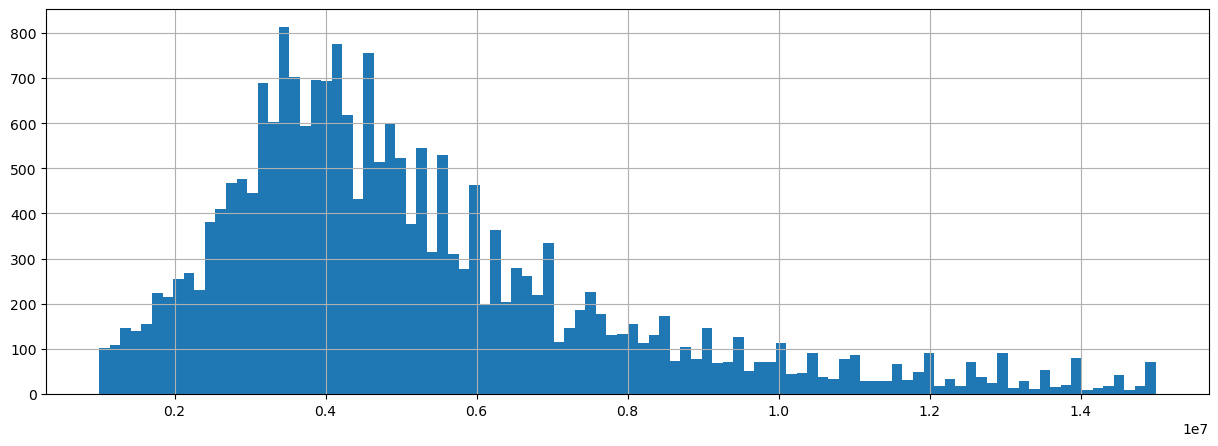

In [137]:
# посмотрим детальнее данные наиболее насыщенного диапазона

df['last_price'].hist(bins=100, figsize=(15,5), range=(1000000,15000000))

Наиболее популярная цена 4,5 млн. В общем стоимость квартиры колеблется в диапазоне от 2,5 до 7 млн. При этом наблюдаются всплески, возможно это целые значения к которым психологически склоняются участники рынка

Изучим данные о высоте потолков `ceiling_height`

<AxesSubplot:ylabel='Frequency'>

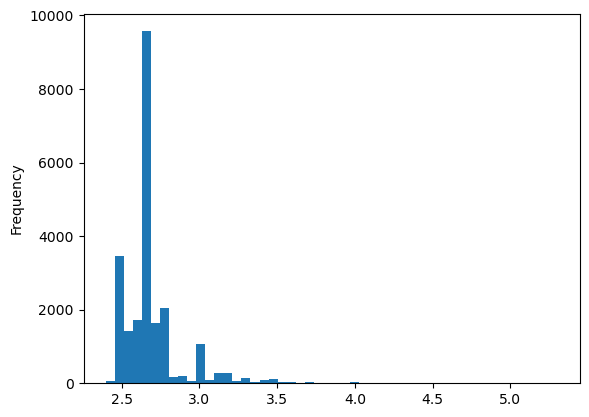

In [138]:
# построим гистограмму распределения значений

df['ceiling_height'].plot(kind='hist', bins=50)

Наиболее распространенная величина 2,65, также часто встречается высота 2,4 остальные менее популярны.

Поработаем с информацией об этажности

<AxesSubplot:ylabel='Frequency'>

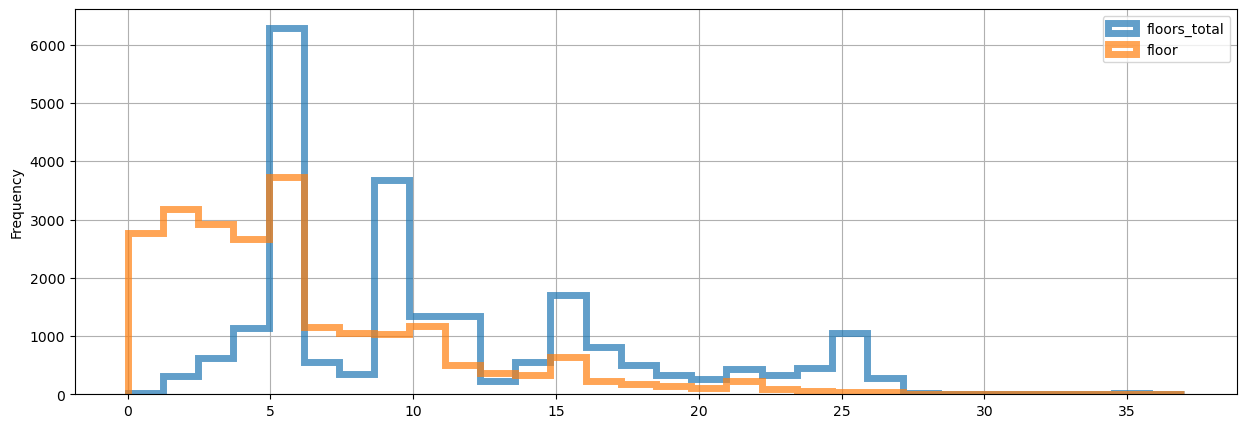

In [139]:
# построим гистограмму распределения наблюдений по общему количеству этажей в доме
ax = df.plot(
    kind='hist',
    y='floors_total',
    histtype='step',
    range=(0, 37),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='floors_total',
    figsize=(15,5)
)

# на этих же осях построим еще одну диаграмму с данными об этаже квартиры
df.plot(
    kind='hist',
    y='floor',
    histtype='step',
    range=(0, 37),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='floor',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(15,5)
) 


Мы вывели на одно поле две гистограммы отражающие распределение предложения по этажам (оранжевый) и общее количество этажей в доме. На графике видно, что наиболее распространенными являются здания с 5 этажами затем идут 9 этажей, после со значительным отставанием 13, 16 и 25 этажные строения (типовые проекты домов). Наиболее предлагаемым является 2 и 6 этаж.

Еще одним параметров для разметки срезов у нас служит тип этажа

<AxesSubplot:>

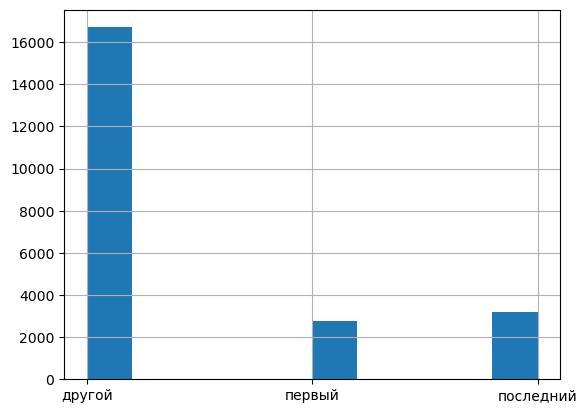

In [140]:
df['floor_type'].hist()

В нашей выборке представлены преимущественно квартиры не на первом и не последнем этаже (что логично). При этом квартир на последнем этаже несколько больше чем на первом. При этом стоит учитвать что для современных проектов характерно наличие так называемого "нулевого" этажа, на котором располагаются коммерческие помещения, соответственно первым этажом будет фактический второй, но в нашей выборке таких данных нет.

Следующий блок информации описывает географического расположение объекта. Одним из основных (для многих) является удаленность от центра и близость к паркам.

Поработаем с `cityCenters_nearest`

<AxesSubplot:ylabel='Frequency'>

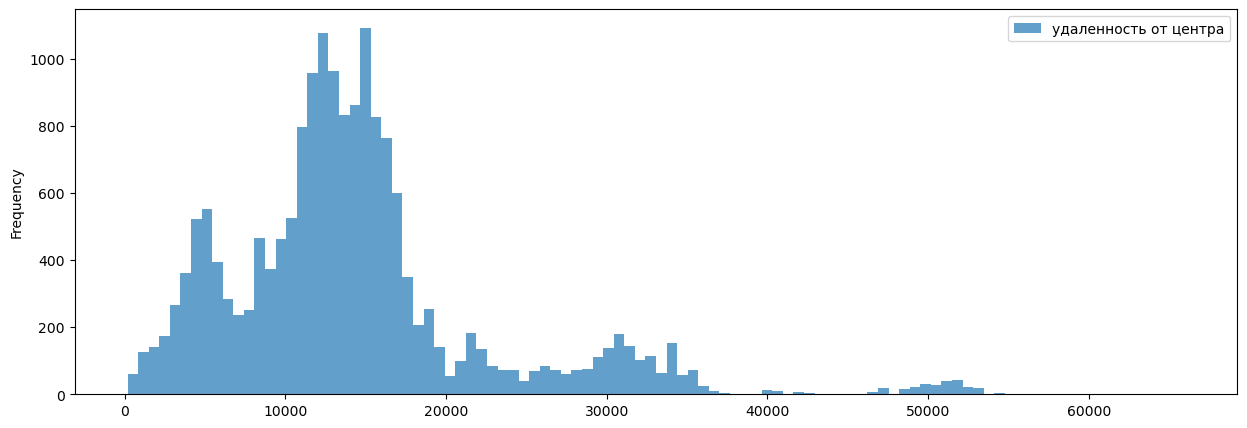

In [141]:
# Построим гистограмму распределеиня величины, не забывая при этом исключить "заглушки"

df.query('cityCenters_nearest>0').plot(
    kind='hist',
    y='cityCenters_nearest',
    bins=100,
    alpha=0.7,
    label='удаленность от центра',
    figsize=(15,5)
)

Информацию в данном столбце скорее можно назвать удаленность от центра города "Санкт-Петербург". Фактически все что расположено далее 20 км уже не относится вобще к Питеру.  
Наиболее распространенным является продажа квартир в "спальных" районах удаленных от центра на расстояние около 13-15 км. 

Поработаем с `parks_nearest`

<AxesSubplot:ylabel='Frequency'>

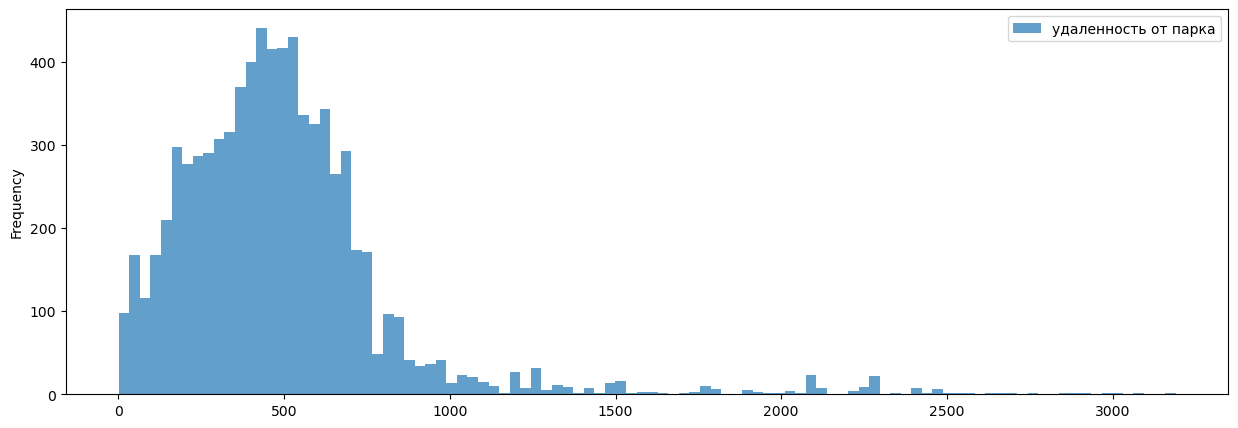

In [142]:
# Построим гистограмму распределеиня величины, не забывая при этом исключить "заглушки"

df.query('parks_nearest>0').plot(
    kind='hist',
    y='parks_nearest',
    bins=100,
    alpha=0.7,
    label='удаленность от парка',
    figsize=(15,5)
)

Основное количествно квартир продается на расстоянии до 1 км от парка. Это скорее характеризует регион как исторически насыщенный подобного вида зонами рекреации и отдыха. При этом на расстоянии 500 м продается наибольшее количество квартир.

Еще одной характеристикой является удаленность от аэропорта `airports_nearest`

<AxesSubplot:ylabel='Frequency'>

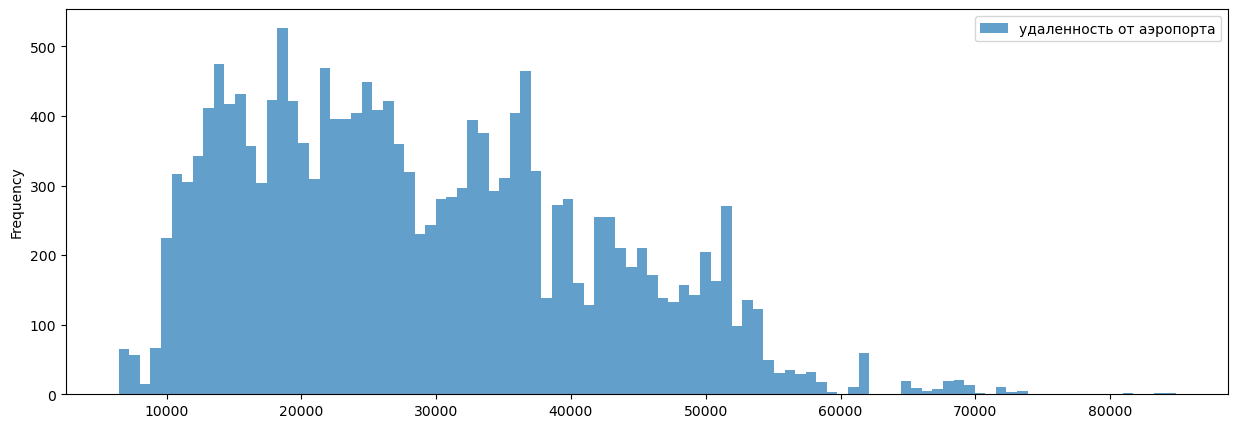

In [143]:
# Построим гистограмму распределеиня величины, не забывая при этом исключить "заглушки"

df.query('airports_nearest>0').plot(
    kind='hist',
    y='airports_nearest',
    bins=100,
    alpha=0.7,
    label='удаленность от аэропорта',
    figsize=(15,5)
)

в основном жилье продается не ближе 10 км от аэропорта, и все лишь незначительная часть расположена ближе.

Оставшийся параметр это дата размещения. Рассмотрим детально день недели и месяц размещения

<AxesSubplot:ylabel='Frequency'>

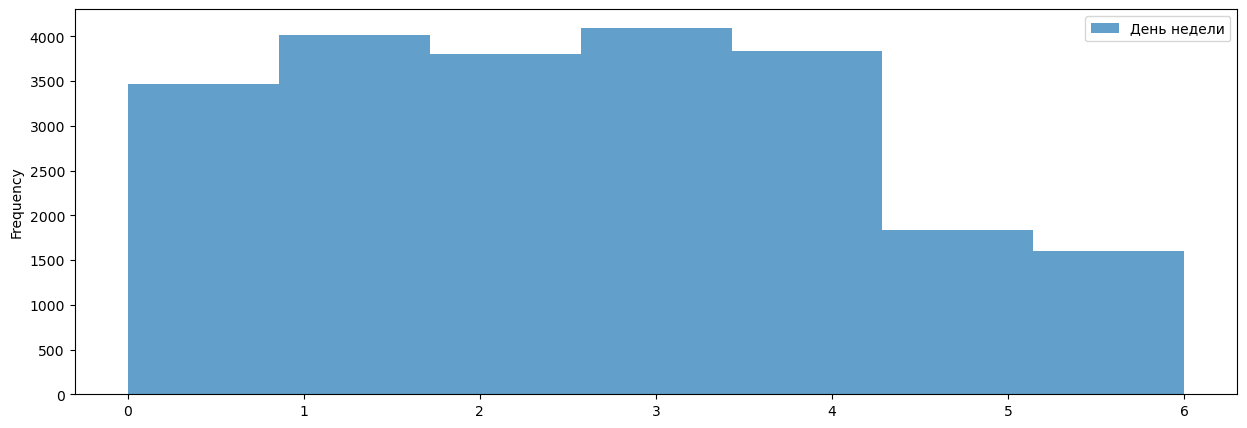

In [144]:
# Построим гистограмму распределеиня величины

df.plot(
    kind='hist',
    y='weekday_of_first_day',
    bins=7,
    alpha=0.7,
    label='День недели',
    figsize=(15,5)
)

Основное количество объявлений размещается в будний день, при этом наибольшее количество во вторник и четверг. На выходных размещений меньше на 50-60%

<AxesSubplot:ylabel='Frequency'>

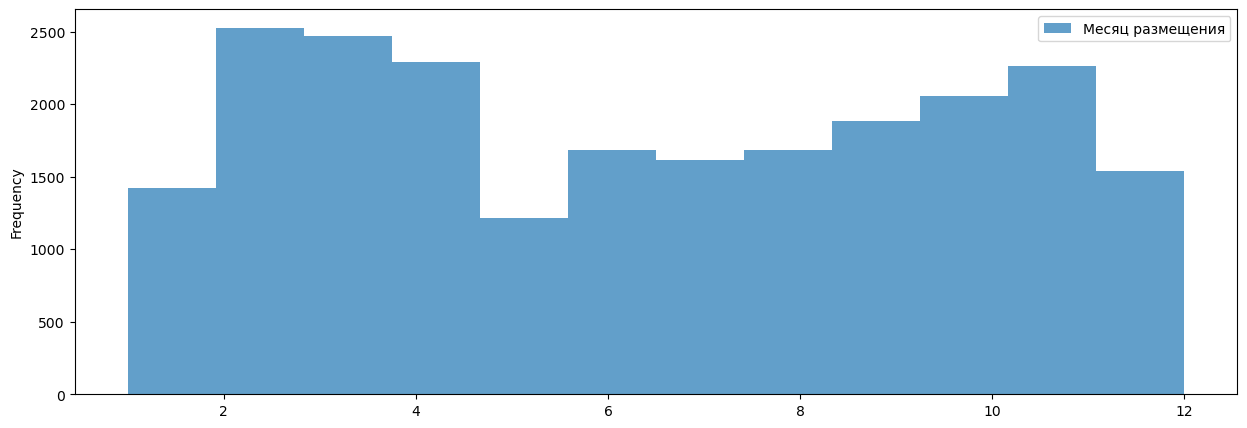

In [145]:
# Построим гистограмму распределеиня величины

df.plot(
    kind='hist',
    y='month_of_release',
    bins=12,
    alpha=0.7,
    label='Месяц размещения',
    figsize=(15,5)
)

Количество размещенных обявлений наибольшее в весенние месяцы, в мае количество резко падает, а летом растет достигая пика в ноябре, в декабре снова уменьшается, в январе почта также мало размещений как и в мае.

### 4.2 Изучим, как быстро продавались квартиры

Эти данные отображены в столбце `days_exposition`

<AxesSubplot:ylabel='Frequency'>

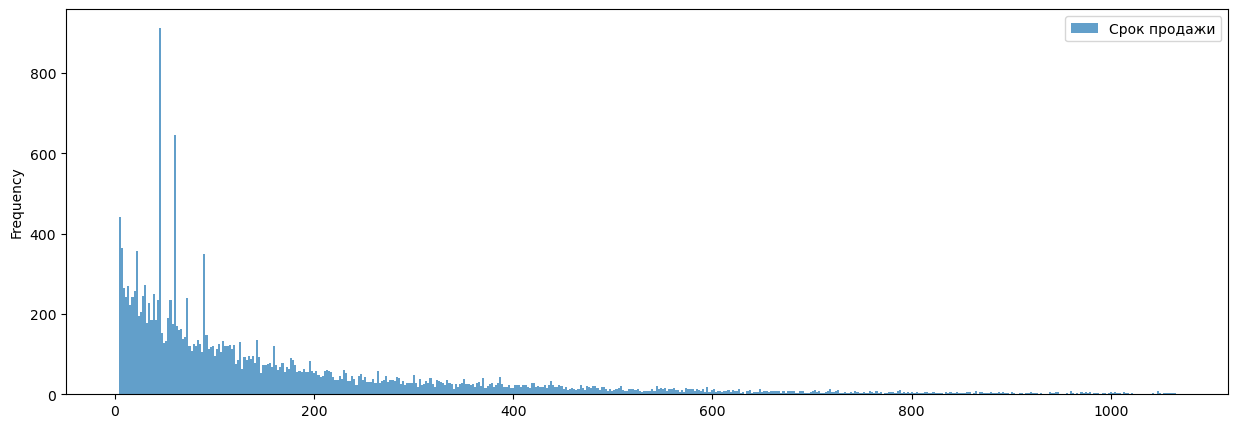

In [146]:
# Построим гистограмму распределеиня величины

df.query('days_exposition>0').plot(
    kind='hist',
    y='days_exposition',
    bins=500,
    alpha=0.7,
    label='Срок продажи',
    figsize=(15,5)
)

<AxesSubplot:>

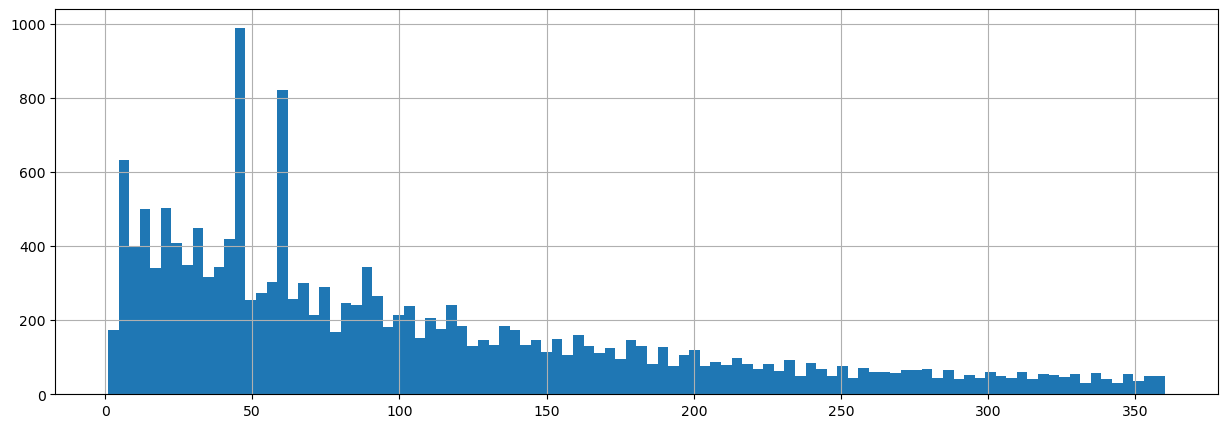

In [147]:
# посмотрим детальнее данные наиболее насыщенного диапазона

df.query('days_exposition>0')['days_exposition'].hist(bins=100, figsize=(15,5), range=(1,360))

In [148]:
# определим моду

df.query('days_exposition>0')['days_exposition'].value_counts()

45      829
60      537
7       229
30      205
90      182
       ... 
975       1
1014      1
854       1
964       1
971       1
Name: days_exposition, Length: 970, dtype: int64

чаще всего квартиры продавались за 45 дней.

In [149]:
# получим описательные статистики этого столбца, исключив значения "заглушки"

df.query('days_exposition>0')['days_exposition'].describe()

count    19603.000000
mean       170.309902
std        192.798481
min          4.000000
25%         45.000000
50%         95.000000
75%        223.000000
max       1065.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

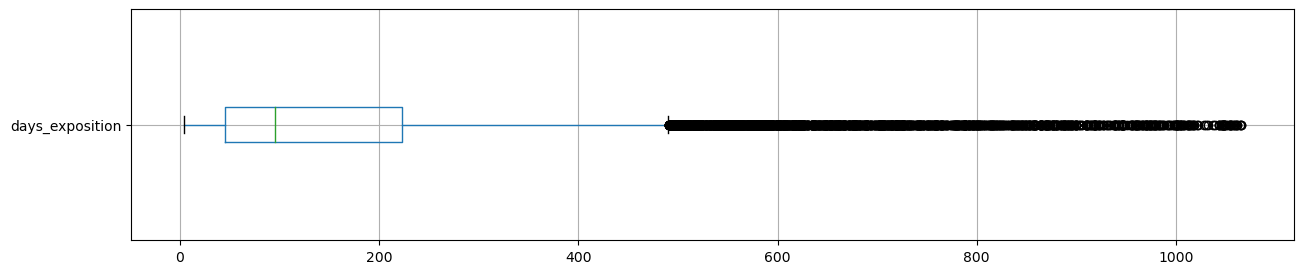

In [150]:
# построим диаграмму размаха

df.query('days_exposition>0').boxplot('days_exposition',figsize=(15,3), vert=False)

Среднее время продажи 170 дней (почти пол года!!) при этом медианное (это 50% персентиль) составляет уже 94 дней (в 2 раза меньше среднего).  
Таким образом очень быстрая продажа это все что быстрее 45 дней.  
Нормальный срок это от 45 до 223 дней.  
Долгая продажа будет ограничена правым "хвостом" т.е. от 223 до (223 + (223 - 45) * 1,5 = 490 дней
Все что больше 490 дней это необычайно долгая сделка. 

### 4.3 Определим какие факторы влияют на полную стоимость объекта

#### Оценим влияние общей площади квартиры

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

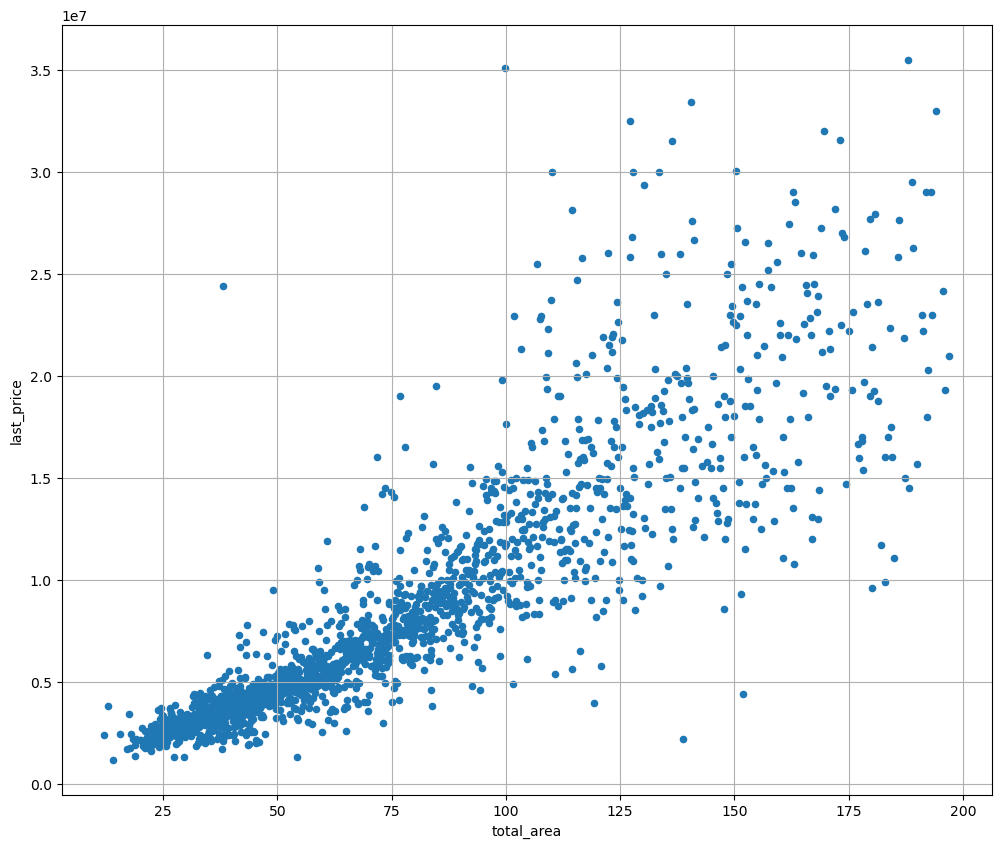

In [151]:
# Определим влияние общей площади на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='total_area', 
    values='last_price')\
    .reset_index()\
    .plot(x='total_area',
          y='last_price',
          kind='scatter', 
          grid=True,
          figsize=(12, 10))

In [152]:
# рассчитаем коэфициент корреляции

df['last_price'].corr(df['total_area'])

0.7795566358569262

Судя по значению коэфициента Пирсона, между величинами прослеживанется взимосвязь, и с ростом общей площади растет цена объекта.

#### Определим влияние жилой площади

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

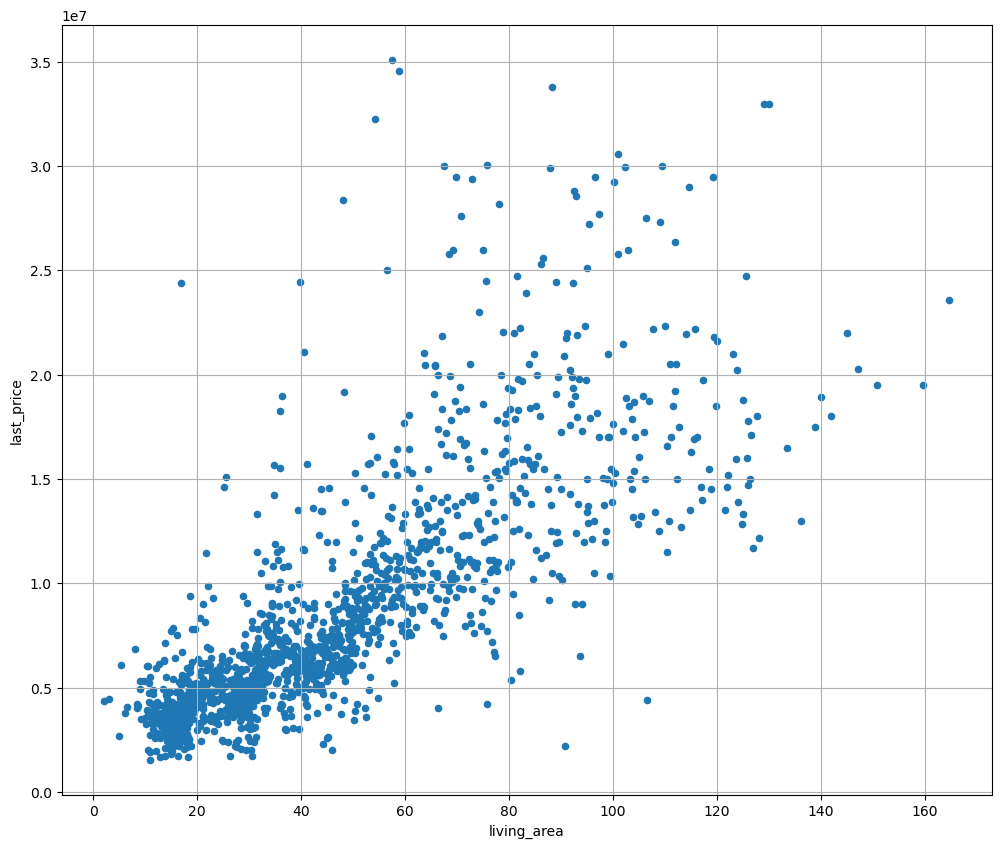

In [153]:
# Определим влияние жилой площади на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='living_area', 
    values='last_price')\
    .reset_index()\
    .plot(x='living_area',
          y='last_price',
          kind='scatter', 
          grid=True,
          figsize=(12, 10))

In [154]:
# расчитаем коэфициент корреляции

df['living_area'].corr(df['last_price'])

0.645102017044145

Значение 0.645 говорит о наличии между величинами определенной взаимосвязи, которая судя по графику сильнее всего проявляется до 60 м2.

#### Определим влияние площади кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

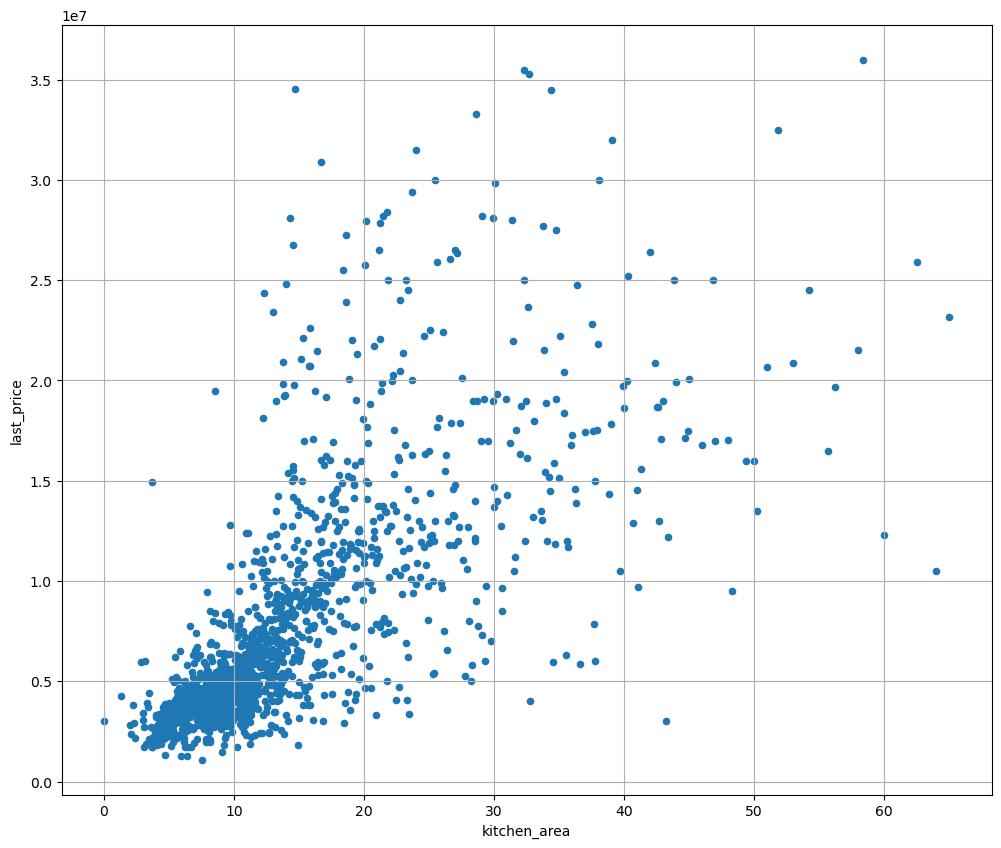

In [155]:
# Определим влияние площади кухни на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='kitchen_area', 
    values='last_price')\
    .reset_index()\
    .plot(x='kitchen_area',
          y='last_price',
          kind='scatter', 
          grid=True,
          figsize=(12, 10))

In [156]:
df['kitchen_area'].corr(df['last_price'])

0.6039863155564454

Площадь кухни также оказывает определенное влияние на общую стоимость что сильнее всего наблюдатется при площади кухни до 15 м2

#### Определим влияние количества комнат

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

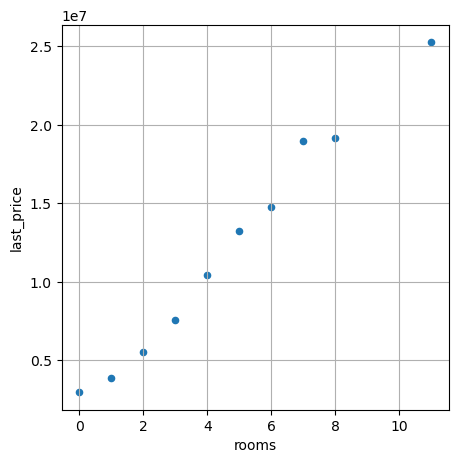

In [157]:
# Определим влияние количества комнат в квартире на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='rooms', 
    values='last_price')\
    .reset_index()\
    .plot(x='rooms',
          y='last_price',
          grid=True,
          figsize=(5, 5),
          kind='scatter')

In [158]:
df['rooms'].corr(df['last_price'])

0.49120920710499416

Между количеством комнат и итоимостью определенно имеется связь, с ростом количества цена растет, но эта зависимость, судя по значению коэфициента корреляции не такая уж и плотная.

#### Определим влияние этажа на котором расположен объект

<AxesSubplot:xlabel='floor', ylabel='last_price'>

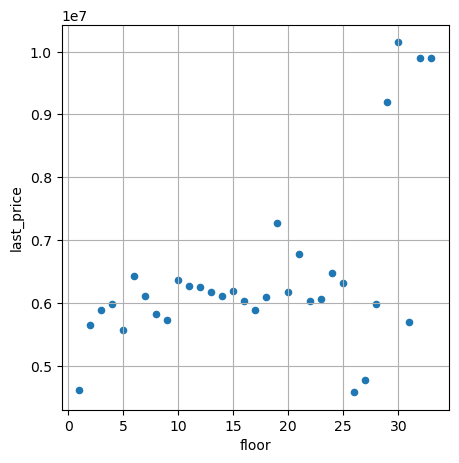

In [159]:
# Определим влияние этажа на котором расположена квартира на цену, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='floor', 
    values='last_price')\
    .reset_index()\
    .plot(x='floor',
          y='last_price',
          grid=True,
          figsize=(5, 5),
          kind='scatter')

In [160]:
df['floor'].corr(df['last_price'])

0.07163160411650021

Судя по графику и коэффициенту зависимости между этими величинами нет.

Ранее мы внесли дополнительный параметр `тип этажа`. Проведем анализ зависимости цены от типа этажа.

<AxesSubplot:xlabel='floor_type'>

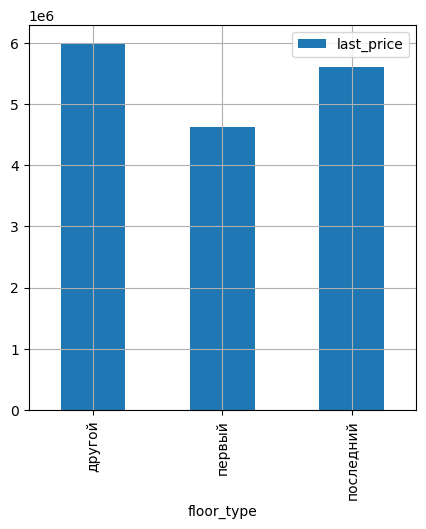

In [161]:
# Определим влияние типа этажа на котором расположена квартира на цену, построив столбчатую диаграмму
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='floor_type', 
    values='last_price')\
    .reset_index()\
    .plot(x='floor_type',
          y='last_price',
          grid=True,
          figsize=(5, 5),
          kind='bar'
          )

Т.к. это категориальный параметр то расчитать коэффицент Пирсона невозможно. При определении взаимосвязи будет ориентроваться только на график.   
Визуально прослеживатся зависимость между стоимостью квартиры и ценой которая говорит нам, что если квартира расположена на 1 этаже то ее цена будет ниже чем если бы она располагалась на последнем или прочих этажах. При этом наибольшую цену имеют квартиры расположенные на прочих этажах.

#### Определим влияние дня недели размещения объявления

<AxesSubplot:xlabel='weekday_of_first_day', ylabel='last_price'>

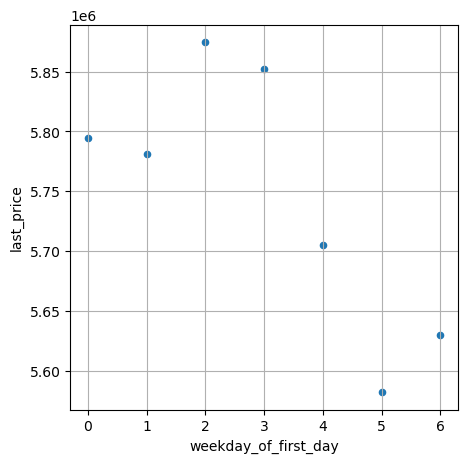

In [162]:
# Определим влияние дня недели размещения объявления на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='weekday_of_first_day', 
    values='last_price')\
    .reset_index()\
    .plot(x='weekday_of_first_day',
          y='last_price',
          grid=True,
          figsize=(5, 5),
          kind='scatter')

In [163]:
df['weekday_of_first_day'].corr(df['last_price'])

-0.014116423728759337

Зависимости нет, при этом можно говорить о том что в выходные обычно цена размещения ниже чем в будние дни.

#### Определим влияние месяца размедения обявления.

<AxesSubplot:xlabel='month_of_release', ylabel='last_price'>

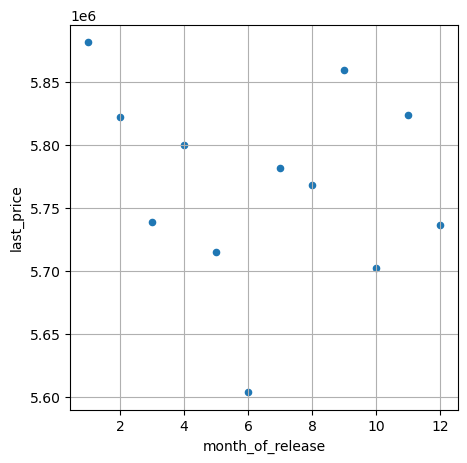

In [164]:
# Определим влияние месяца в котором было зазмещено объявления на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='month_of_release', 
    values='last_price')\
    .reset_index()\
    .plot(x='month_of_release',
          y='last_price',
          grid=True,
          figsize=(5, 5),
          kind='scatter')

In [165]:
df['month_of_release'].corr(df['last_price'])

-0.0028337522180937307

Связь между этими величинами отсутствует

#### Определим влияние года размещения объявления

<AxesSubplot:xlabel='year_of_release', ylabel='last_price'>

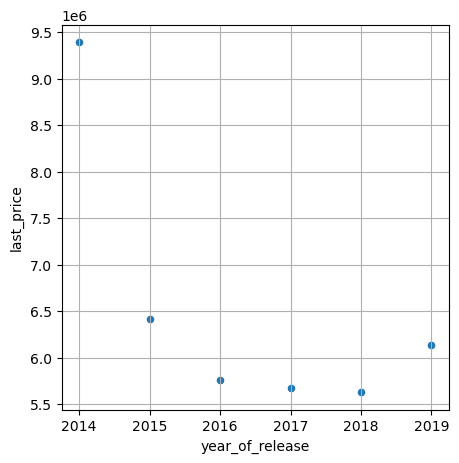

In [166]:
# Определим влияние года размещегния объявления на цену объекта, построив диаграмму рассеивания
# предварительно сгруппировав данные с помощью сводной таблицы

df.pivot_table(
    index='year_of_release', 
    values='last_price')\
    .reset_index()\
    .plot(x='year_of_release',
          y='last_price',
          grid=True,
          figsize=(5, 5),
          kind='scatter')

In [167]:
df['year_of_release'].corr(df['last_price'])

-0.014408060124900562

Кореляция между величинами отсутствует. При этом максимальные цены наблюдались в 2014 году.

### 4.4 Анализ средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [168]:
# отфильтруем датасет по количеству объявлений для каждого населенного пункта, используя `value_counts` который выдаст 
# значения по убыванию. Сброим индексы и возьмем только первые 10 строк.

df_top10_count = df.value_counts('locality_name').reset_index().query('index<=9')

In [169]:
# Переименуем столбцы для удобства

df_top10_count.columns=['locality_name', 'count']

In [170]:
# Проверим результат

df_top10_count

,locality_name,count
0,Санкт-Петербург,15074
1,Мурино,580
2,Кудрово,465
3,Шушары,436
4,Всеволожск,393
5,Пушкин,360
6,Колпино,331
7,Парголово,320
8,Гатчина,302
9,Выборг,231


In [171]:
# С помощью сводных раблиц создадим новую таблицу со средним значением стоимости квадратного метра 
# по каждому населенному пункту

df_max_price = (df.pivot_table(index='locality_name', values='area_cost')).round(0)

# проверим результат
df_max_price

,area_cost
locality_name,
Агалатово,71215.0
Александровская,70262.0
Алексеевка,22222.0
Аннино,63323.0
Аро,51412.0
...,...
Юкки,77948.0
Яльгелево,56220.0
Янино-1,70596.0


In [172]:
# объеденим таблицы для получения средней стоимости метра по первым населенным пунктам с наибольшим количеством объявлений

df_top_10_max_price = df_top10_count.merge(df_max_price, on='locality_name', how='left').set_index('locality_name')

# проверим результат
df_top_10_max_price

,count,area_cost
locality_name,,
Санкт-Петербург,15074,111167.0
Мурино,580,85967.0
Кудрово,465,95295.0
Шушары,436,78702.0
Всеволожск,393,68810.0
Пушкин,360,103213.0
Колпино,331,75351.0
Парголово,320,90150.0
Гатчина,302,68917.0


<AxesSubplot:xlabel='locality_name'>

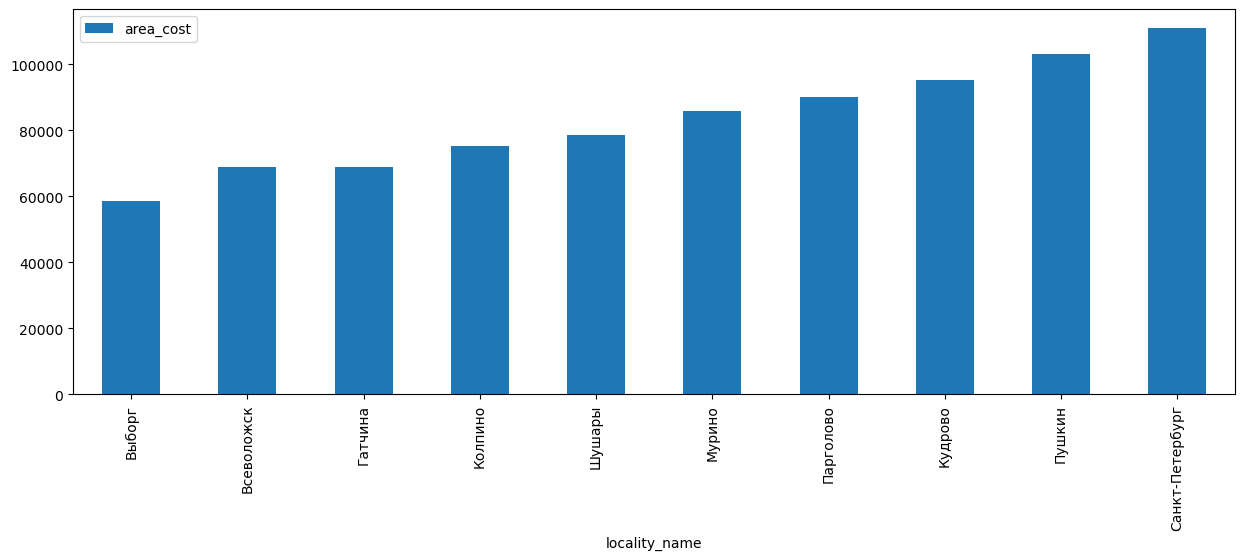

In [173]:
# построим столбчатую диаграмму отражающую стоимость метра в населенных пунктах с наибольшим количеством объявлений

df_top_10_max_price.sort_values(by='area_cost').plot(kind='bar', y='area_cost', figsize=(15,5))

**Вывод:** В лидерах по количеству объявлений (15 074 шт.) и стоимости метра (111 167 руб.) ожидаемо город Санкт-Петербург. На 10 месте и по стоимости метра, с показателем 58 738 руб./м2, и по количеству объявлений которых там 231 шт. нахдится Выборг.

In [174]:
df.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15074,5485000.0
Мурино,580,3400000.0
Кудрово,465,3890000.0
Шушары,436,3950000.0
Всеволожск,393,3480000.0
Пушкин,360,5150000.0
Колпино,331,3600000.0
Парголово,320,4100000.0
Гатчина,302,3100000.0


### 4.5 Анализ зависимости стоимости объектов от расстояния до центра города Санкт-Петербурга

In [175]:
#  Отфильтруем данные только по городу Санкт-Петербург. Будем считать размер города около 15 км.

df_spb = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km<=15 ')

Размер города Санкт-Петербург
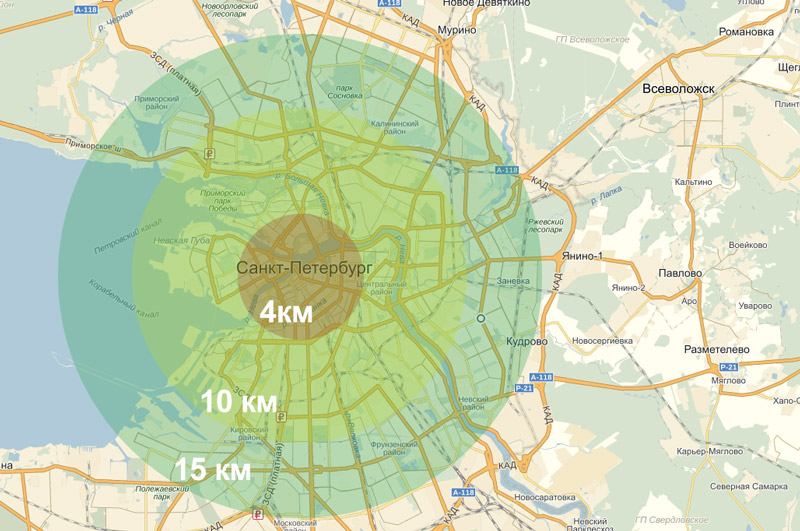#y

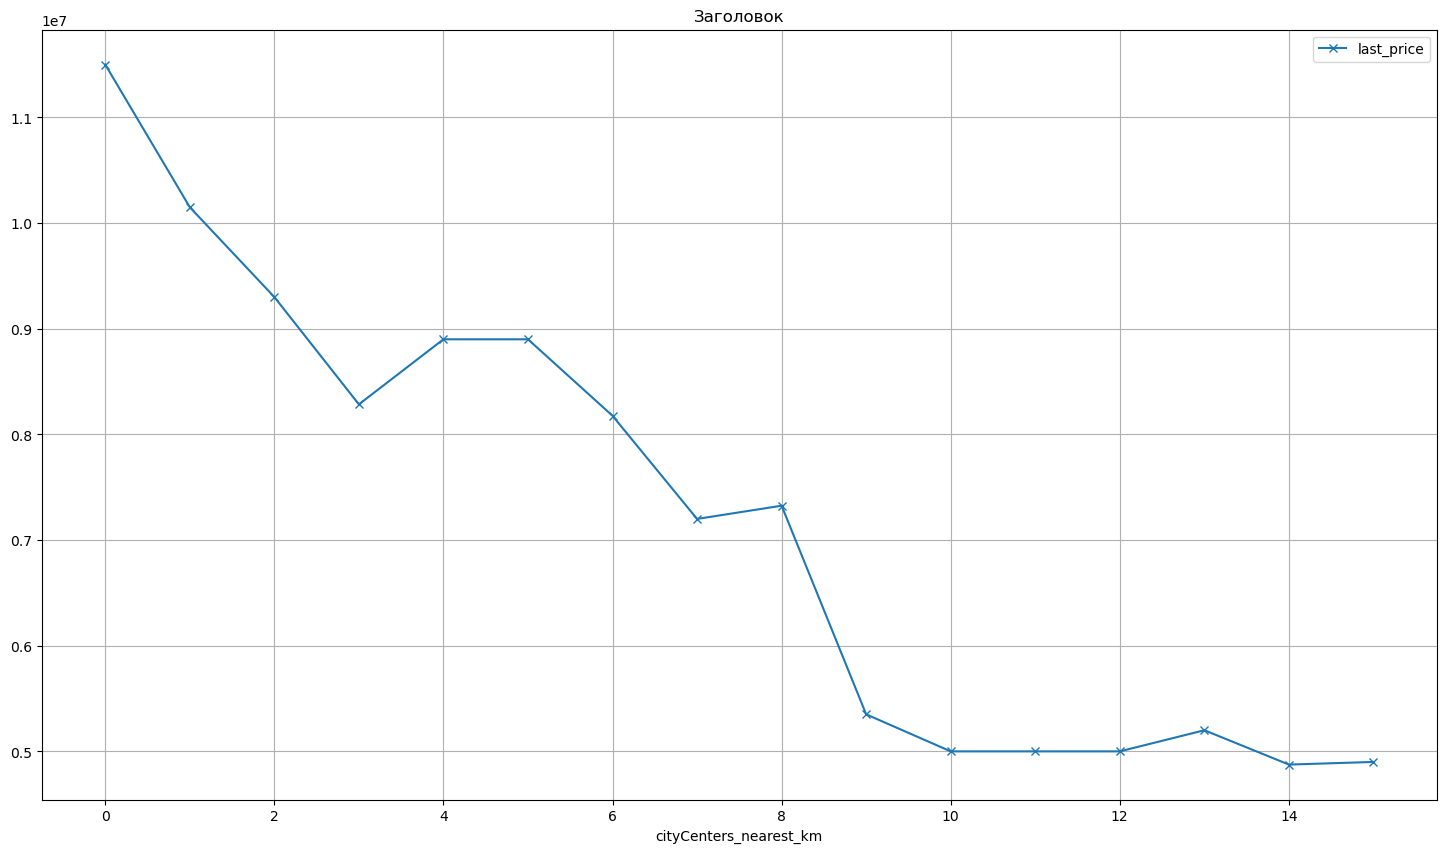

In [176]:
# построим график зависимости стоимости недвижимости от расстояния до центра города

df_spb.pivot_table(
    index='cityCenters_nearest_km', 
    values='last_price',
    aggfunc='median')\
.reset_index()\
.plot(x='cityCenters_nearest_km',
          y='last_price',
          grid=True,
          figsize=(18, 10),
          style='x-',
          title = 'Заголовок');

In [177]:
df_spb.pivot_table(
    index='cityCenters_nearest_km', 
    values='last_price',
    aggfunc='median').reset_index()

,cityCenters_nearest_km,last_price
0,0,11500000.0
1,1,10150000.0
2,2,9300000.0
3,3,8284500.0
4,4,8900000.0
5,5,8900000.0
6,6,8176000.0
7,7,7200000.0
8,8,7325000.0
9,9,5350500.0


In [186]:
# вычислим "стоимость километра" для цены недвижимосити
round(((df_spb.pivot_table(
    index='cityCenters_nearest_km', 
    values='last_price',
    aggfunc='median')['last_price'].max()-\
df_spb.pivot_table(
    index='cityCenters_nearest_km', 
    values='last_price',
    aggfunc='median')['last_price'].min())/15),0)


441667.0

Стоимость недвижимости снижается при удалении из ценра где медианное значение составило 11 500 000 и на окраине (на расстоянии 15 км. цена снизилась до 4 900 000. таким образом средняя стоимость километра составила **441 667 руб.** При этом падение ступенчатое, сначала наблюдается снижение до 3 км. Потом небольшой рост и более правное снижение до расстояния 7 км. потом небольшой подъем и снова снижение.

In [182]:
df_spb.query('cityCenters_nearest_km==3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,first_day_exposition_opt,living_area_cor,area_cost,weekday_of_first_day,month_of_release,year_of_release,floor_type,cityCenters_nearest_km
99,32,9600000.0,90.0,2017-09-26T00:00:00,4,2.65,5,67.0,2,False,...,0.0,104,2017-09-26,67.0,106667,1,9,2017,другой,3
138,8,4800000.0,40.0,2017-11-18T00:00:00,2,2.65,3,29.0,2,False,...,729.0,80,2017-11-18,29.0,120000,5,11,2017,другой,3
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3,44.2,2,False,...,838.0,38,2018-11-06,44.2,102500,1,11,2018,другой,3
179,5,14800000.0,108.7,2019-04-11T00:00:00,3,4.00,5,72.4,5,False,...,0.0,-1,2019-04-11,72.4,136155,3,4,2019,последний,3
181,2,7900000.0,71.8,2017-08-23T00:00:00,3,3.00,5,38.7,1,False,...,585.0,-1,2017-08-23,38.7,110028,2,8,2017,первый,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23178,7,5950000.0,60.0,2018-02-01T00:00:00,3,2.80,5,42.0,1,False,...,0.0,85,2018-02-01,42.0,99167,3,2,2018,первый,3
23387,7,5600000.0,50.0,2017-08-21T00:00:00,1,2.65,5,27.0,1,False,...,56.0,45,2017-08-21,27.0,112000,0,8,2017,первый,3
23430,18,5260000.0,38.0,2018-11-06T00:00:00,1,3.30,5,16.0,1,False,...,466.0,12,2018-11-06,16.0,138421,1,11,2018,первый,3
23449,4,6300000.0,52.6,2015-05-28T00:00:00,3,3.25,5,29.8,2,False,...,69.0,505,2015-05-28,29.8,119772,3,5,2015,другой,3


## Общий вывод

Общий вывод:
В датасете представлены данные о продаже квартир в г.Санкт-Петербург и соседних населенных пунктах с 2014 по 2019 годы  Всего представлены данные по 23 699 объектам по 22 параметрам.  
**Задачей** являлось проведение предобработки данных и изучение с целью выявления особенностей и зависимостей которые существуют на рынке недвижимости.  
В рамках решения поставленной задачи нами было выполнено следующее:  
**Предобработка данных:**  
*В том числе найдены и заполнены пропуски,*  
а именно: изначально пропуски данных были обнаружены в 14 столбцах из 22. из них 2 категориальные, остальные количественные.
Для столбца `is_apartment` пропуски заменили на `False` исходя из предположения что продавая квартиру, люди даже не задумывались о заполнении этой графы. По тому же принципу заполняли пропуски в данных о количестве балконов и наличии в радиусе 3 км парков.
Для ряда значений в силу невозможности корректного заполнения данными были применены т.н. "заглушки", это поля о близости аэропорта, ближайшего пруда и парка, центра города. Такой способ был применен если для группы сходных объектов не указан такой параметр. Остальные заполнены медианным значение для группы расположенной в данном регионе.
Количественные данные типа высоты потолков были заполнены медианными значениями.
При этом для ряда данных где это применимо были использованы медианные значения для группы сходных объектов. Например жилая площадь определялась как медиана для квартир имеющих такое же количество комнат.
Площадь кухни вычислялась как медианная доля от общей площади.
Максимальное количество этажей было взято как медиана, но при превышении этажа квартиры над общим количеством этажей, последнее приравнивалось к этажу квартиры.
Строки с пропусками данных о названии населенного пункта было решено удалить т.к. не существует способа восстановить отсутствующие данные.
Пропуски данных в столбце содержащем информацию о длительности размещения объявления, на мой взгляд, обусловлены тем, что на момент выгрузки информации из базы эти объявления все еще актуальны поэтому эти пропуски заполним заглушкой.  
*Проведена работа по оптимизации типов данных:*  
В исследуемом дата сете изначально было 22 столбца из которых 3 - bool, 14 - float64, 3 - ing64, 2 - object. 
Исходя из сути значений было решено преобразовать формат данных столбца о первом дне размещения в `datetime64` . Часть данных содержащих целочисленные значения были переведены в `int8` для экономии ресурсов. Остальные оставлены без изменений.  
*Выявлены и устранены неявные дубликаты.*  
При изучении данных о локациях в которых рамещены объекты, выявлено, что наблюдаются не явные дубликаты. Причиной являются опечатки в наименованиях типов населенных пунктов таких например как буква "Ё" вместо буквы "Ё" в слове "посЁлок" и т.п., а также разные варианты названия одних и тех же населенных пунктов. Было решено исключить данные о типах совсем и использовать только уникальные названия.  
*Устранены редкие и уникальные значения*  
в данных которые могли оказать влияние на корректность выводов. 
В группе данных описывающих площадь продаваемых квартир был найден ряд ошибок в пропорциях между общей площадью, жилой площадью и площадью кухни. Которые были устранены. Также выявили часть квартир с экстремально большой площадью, и решено было убрать те которые принадлежат 99 персентилю. 
В данных о высоте потолков мы обнаружили ряд ошибочных данных в нижней и верхней части диапазона. Что-то было признано опечаткой, а часть просто заменили т.к. это параметр не являющийся ключевым в рамках данного исследования.
Выбивающихся данных в этаже квартиры не обнаружено.
В данных о общем количестве этажей в доме были выявлены опечатки (60 этаж в Кронштате вместо 6) и неточности. Данные о высотности зданий взяты из открытых источников.
Данные об удаленности объекта до центра города не редактировались, хотя под вопросом суть указанной информации. Имеются значения до 60 км и более, при чем размер самого Санкт-Петербурга не более 15 км до КАД.
В данных об удаленности от аэропорта удалено значение квартиры расположенной в 0 км от аэропорта.
В данных о ближайшем парке есть ряд значений выходящих за диапазон в 3 км., но они оставлены в силу незначительности параметра.
Информация о количестве парков в округе вопросов не вызвала.
При изучении срока размещения объявления были выявлены экстремально длительные (более 1069 дней) сроки продажи которые было принято исключить наряду с экстремально быстрыми (менее 4 дней), которые было решено исключить для корректных результатов исследования.
В данных о финальной стоимости также были обнаружены драматические значения. Которые в нижней части скорее всего обусловлены ошибками, а в верхней уникальностью продаваемых объектов. Под исключение попали по 1% с каждой стороны.
В данных о количестве комнат также наблюдались аномальные значения в верхней части диапазона. Верхний персентиль составил 5 комнат, при этом максимальное значение было 18. Их решили исключить для уменьшения влияния на результат.
Итого было принято решение исключить верхних персентиль значений о количестве комнат, общей площади, итоговой цене и днях продажи, кроме того исключили нижний персентиль для цены и срока продажи. С учетом пересечения диапазонов это составило 1025 значений или 4,5% от общей выборки.  
Для расширения спектра получаемых выводов и увеличения параметров исследования в исходный датасет были **добавлены производные столбцы** содержащие информацию о стоимости квадратного метра `area_cost`, дня недели публикации объявления `weekday_of_first_day`, месяц `month_of_release` год - `year` публикации. Данные о типе этажа квартиры таких как "первый", "последний" и "другой". Кроме того переведено в целые километры значение расстояния объекта от центра города. Все эти новые величины позволять взглянуть на изучаемые наблюдения под новым углом.  
*Далее проведено предварительное исследования ключевых параметров и описано их поведение*  
 на основе гистограмм. Определены "типовые" площади для квартир с разным количеством комнат: 30 м2 для однушек, 45 м2 для двушек и 60 м2 для трехкомнатных квартир. В которых жилая площадь составляет 18 метров для одно, 30 для двух и 45 для трех комнатных квартир. При этом подобной зависимости нет для площади кухни которая для всех типов квартир составила от 6 до 10 метров.  
Самыми распространенными предложениями являются однокомнатные квартиры, затем с небольшим отставанием идут двушки, далее с большим отрывом трешки, остальные практически не представлены.  
В дата сете чаще всего квартиры продаются за 4,5 млн. рублей при этом наиболее популярный диапазон цен от 2,5 до  7 млн. При этом продавцы склонные к целочисленным значениям цены, о чем свидетельствует "забор" на гистограмме цены.  
Чаще всего продают квартиру с высотой потолка 2,65.  
Касательно этажности. Больше всего представлено на рынке домов в 5 этажей, затем идут 9 и 16 этажные. При этом чаще всего продаваемые квартиры расположены на 2 и 6 этажах из "Прочих", а первых и последних этажей практически одинаковое количество.
В плане расположения к центру города, ожидаемо, большее количество продаваемых квартир находится в "спальных" районах расположенных на удалении 10-20 км от центра.  
При этом почти возле всех квартир в радиусе 800 метров находится парк, что говори о хорошей планировке городских пространств.
По отношению к аэропорту большинство объектов удалено на расстояние от 10 до 50 км.  
Что касается времени размещения объявлений, то основное количество из них размещено в будние дни, в весенние(кроме мая) и осенние месяцы, летом и в зимние месяцы их заметно меньше.  
При детальном изучении времени продажи определено что модальным сроком продажи квартиры является 45 дней. При этом среднее время продажи это 170 дней, а медианное 94. Следовательно очень быстрая продажа это все что быстрее 45 дней, быстрая 45-94, нормальная 94-170, долгая до 223 дней (третий квартиль) и необычайно долгая все что больше этой величины.  
*В ходе изучения возможного влияния ключевых параметров на основной показатель продажи объекта недвижимости "итоговую цену"* выявлено что наибольшее влияние оказывают такие параметры как: общая площадь (коэффициент Пирсона 0,7795), затем идет жилая площадь (0,645), площадь кухни (0,603). Количество же комнат влияет не столь существенно, для него коэффициент корреляции уже составил 0,49.  
*Квартиры расположенные на прочих (не первый и не последний) этажах стоят дороже, при этом квартира на 1 этаже будет стоить дешевле чем на последнем*  
При этом время размещения объявления (день недели, месяц и год) не оказывают хоть какого-то существенного влияния на уровень цены. При этом в общем в 2014 году цены были значительно выше.  
Также проведена работы по определению *населенных пунктов с наибольшим количеством объявлений и средней ценой квадратного метра* в них. В лидеры, ожидаемо, вышел Санкт-Петербург с показателем 15 074 объявлений и стоимостью метра в 111 167 руб. на 10 месте и по количеству объявлений и стоимости расположился Выборг с показателем в 231 шт и 58 738 руб./м2  
И в заключение была *оценена динамика цены недвижимости при удалении объекта от центра г.Санкт-Петербург*. При этом в качестве границы были взяты пределы ограниченные КАД (кольцевой автодорогой). Т.к. на наш взгляд будет не корректно сравнивать большие расстояния, т.к. они уже находятся в других населенных пунктах и для них считаются важными несколько другие центры притяжения. В результате определено, что с удалением от центра стоимость уменьшается со скоростью 441 667  руб./км. Соответственно медианная стоимость условной квартиры в центре сотавляет 11,5 млн, а на удалении 15 км. Это уже 4,9 млн. При этом падение не постоянное, на определенных отрезках (3 и 7 км) от центра наблюдается небольшой отскок, но в общем динамика на понижение сохраняется.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод